<a href="https://colab.research.google.com/github/motoroko/Stock-Price-Prediction-CNN-GAF/blob/main/Stock_Price_Prediction_Using_CNN_GAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Library & Depedencies

In [ ]:
!pip install yfinance mplfinance finta pyts
!pip install keras-tuner --upgrade

# Library for Calculating and Math
import pandas as pd
import numpy as np
import datetime
import random
import math

# Library for Visualization data
import mplfinance as mpf
import matplotlib.pyplot as plt

# Library for Fetching and Collecting data
from pandas_datareader import data as wb
import yfinance as yf
yf.pdr_override()

# Library for Indicators Data
from finta import TA
from statsmodels.tsa.seasonal import seasonal_decompose

# Library For GAF Imaging
from pyts.image import GramianAngularField

# arsitektur CNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, BatchNormalization, Reshape, LSTM, TimeDistributed
from keras.layers.core import Flatten, Dropout
import keras_tuner

# Tambahan
import os
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.7 MB/s eta 0:00:00


# 2. Data

## 2.1 Ticker

In [ ]:
# Ticker di index saham IDX30

tickers = [
           'ADRO.JK', 'ANTM.JK', 'ARTO.JK', 'ASII.JK', 'BBCA.JK', 'BBNI.JK',
           'BBRI.JK', 'BMRI.JK', 'BRPT.JK', 'BUKA.JK', 'CPIN.JK', 'EMTK.JK',
           'GOTO.JK', 'HRUM.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INKP.JK',
           'ITMG.JK', 'KLBF.JK', 'MDKA.JK', 'PGAS.JK', 'PTBA.JK', 'SMGR.JK',
           'TBIG.JK', 'TINS.JK', 'TLKM.JK', 'TOWR.JK', 'UNTR.JK', 'UNVR.JK',
       ]

## 2.2 Data Collecting

In [ ]:
# Mengambil Data dari Yahoo Finance berdasarkan rentang waktu dan Ticker sebelumnya
df = pd.DataFrame()
for saham in tickers:
  data = wb.get_data_yahoo(saham, start='2020-05-23', end= '2023-05-23', interval='1D')
  data['Tic'] = saham
  data.reset_index(inplace=True)
  df = pd.concat([df,data],axis=0)
df.rename(columns={"Datetime": "Date"},inplace=True)
df.Date = pd.to_datetime(df.Date)
df.drop('Adj Close',axis=1, inplace=True)
df.set_index('Date', inplace=True, drop=True)
df.sort_values(['Date','Tic'],inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df

,Open,High,Low,Close,Volume,Tic
Date,,,,,,
2020-05-26,1000.000000,1020.000000,975.000000,1000.000000,49777400,ADRO.JK
2020-05-26,530.000000,530.000000,515.000000,530.000000,32358800,ANTM.JK
2020-05-26,746.395508,746.395508,717.369019,746.395508,28215,ARTO.JK
2020-05-26,3970.000000,4360.000000,3970.000000,4330.000000,116041900,ASII.JK
2020-05-26,4775.000000,5000.000000,4775.000000,4970.000000,176076500,BBCA.JK
...,...,...,...,...,...,...
2023-05-22,945.000000,965.000000,940.000000,945.000000,4625100,TINS.JK
2023-05-22,4000.000000,4080.000000,3980.000000,4040.000000,115578100,TLKM.JK
2023-05-22,1030.000000,1035.000000,1005.000000,1010.000000,15604800,TOWR.JK


In [ ]:
# Menampilkan jumlah data per masing masing saham
for tic in tickers:
  print(tic,df[df.Tic == tic].shape[0])

ADRO.JK 729
ANTM.JK 729
ARTO.JK 729
ASII.JK 729
BBCA.JK 729
BBNI.JK 729
BBRI.JK 729
BMRI.JK 729
BRPT.JK 729
BUKA.JK 438
CPIN.JK 729
EMTK.JK 729
GOTO.JK 269
HRUM.JK 729
ICBP.JK 729
INCO.JK 729
INDF.JK 729
INKP.JK 729
ITMG.JK 729
KLBF.JK 729
MDKA.JK 729
PGAS.JK 727
PTBA.JK 729
SMGR.JK 729
TBIG.JK 729
TINS.JK 729
TLKM.JK 729
TOWR.JK 729
UNTR.JK 729
UNVR.JK 729


Pergerakan Data 3 bulan terakhir

ADRO.JK


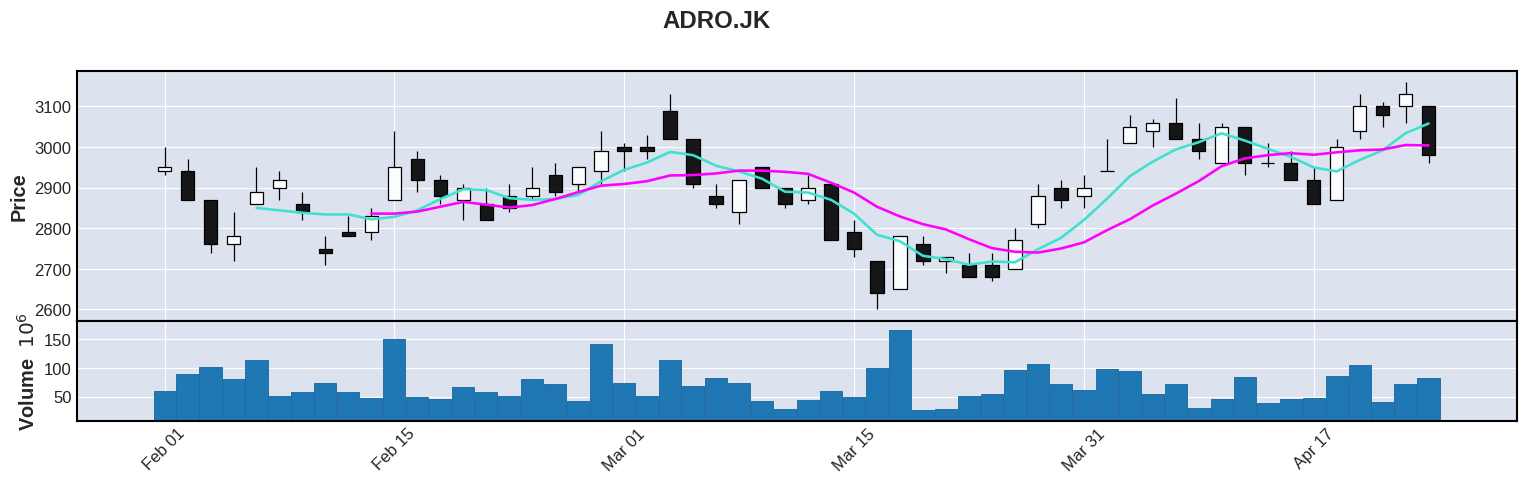


ANTM.JK


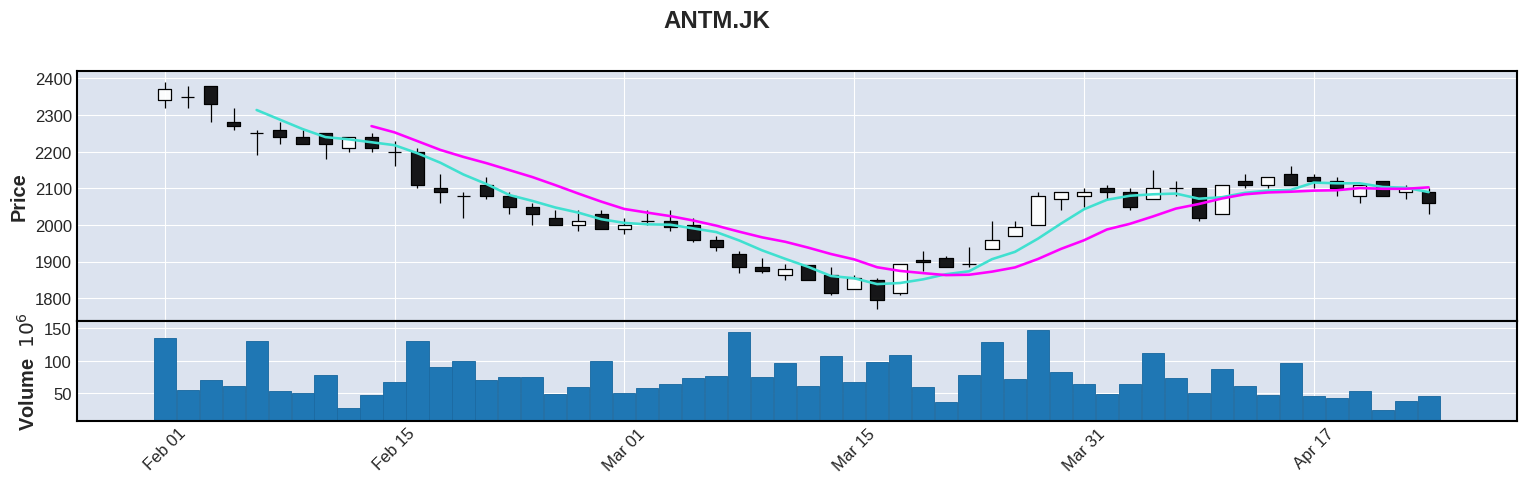


ARTO.JK


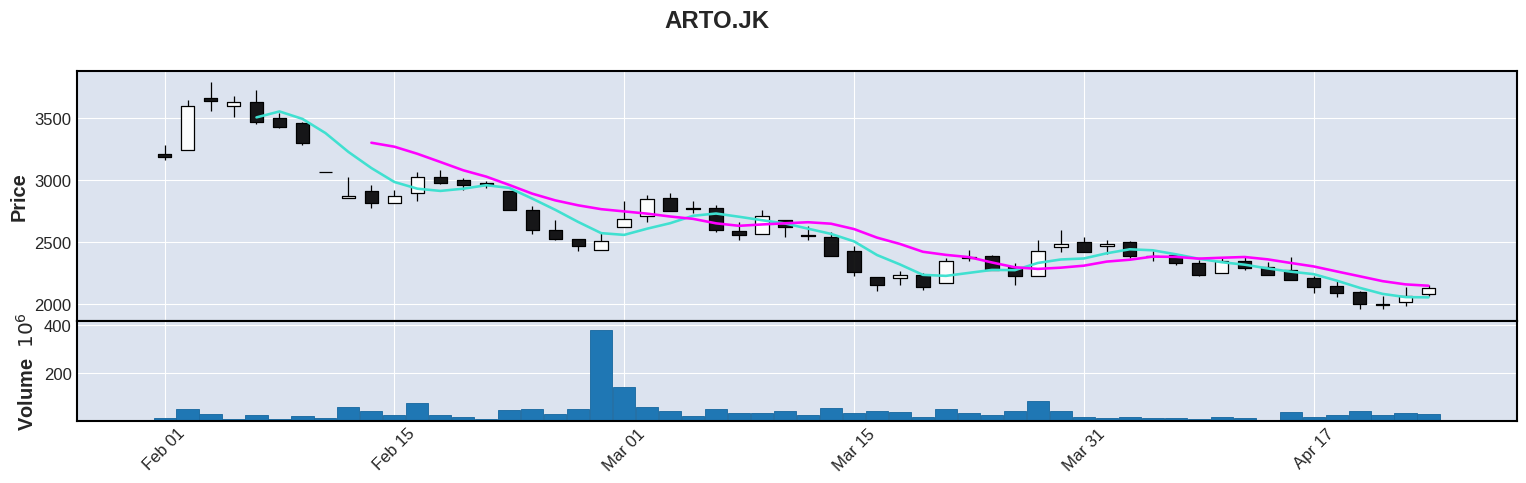


ASII.JK


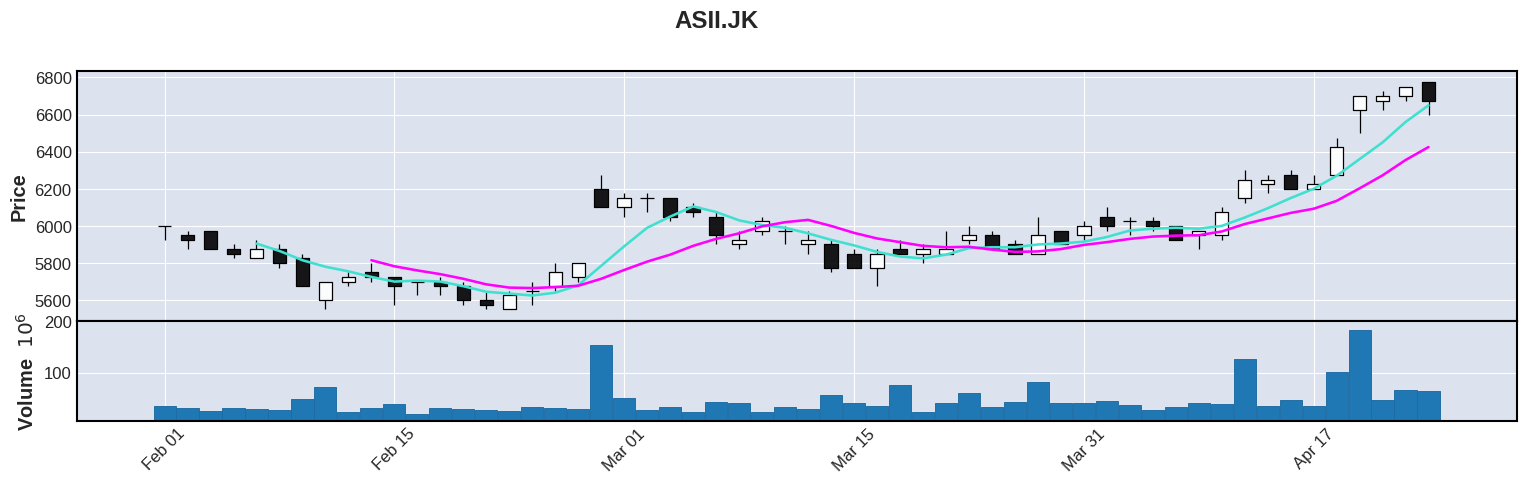


BBCA.JK


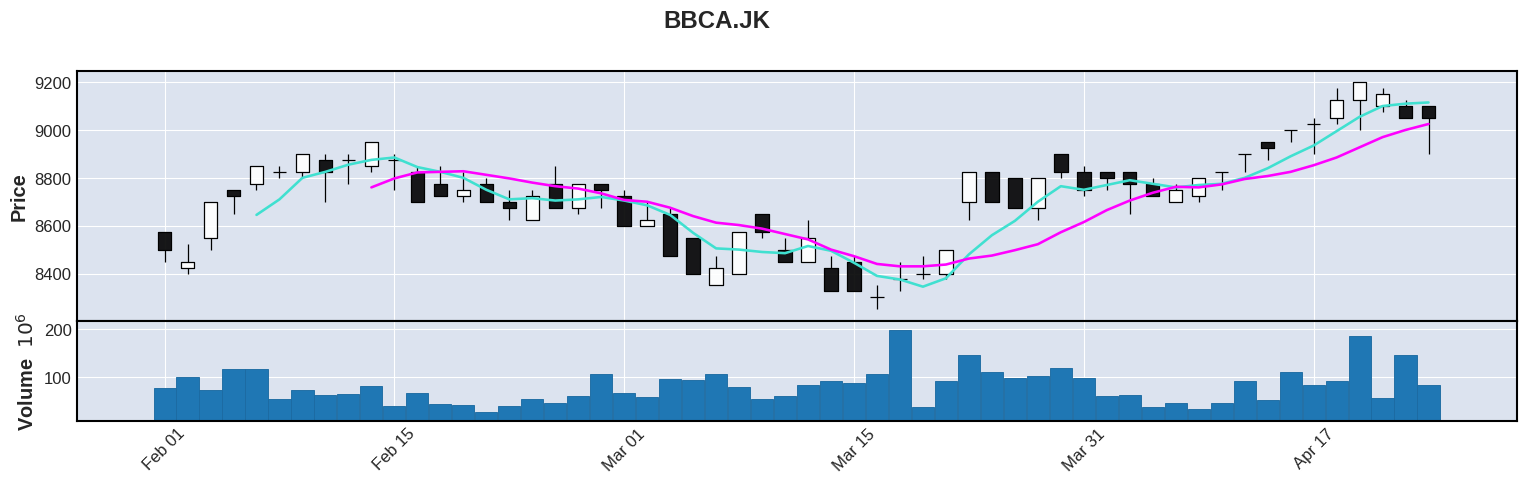


BBNI.JK


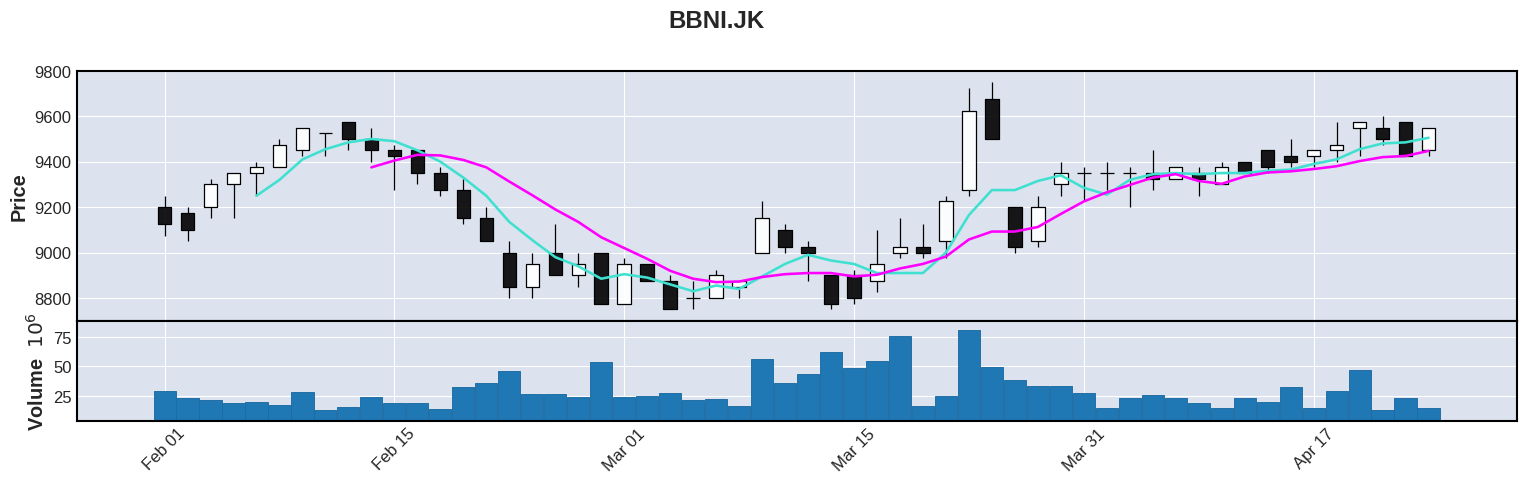


BBRI.JK


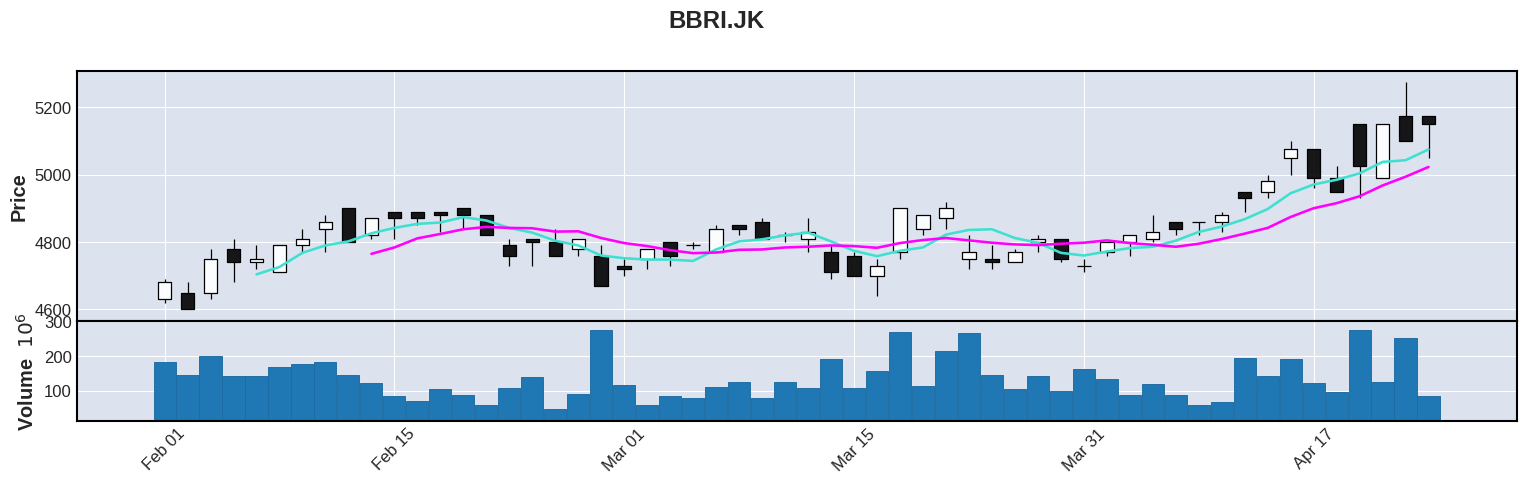


BMRI.JK


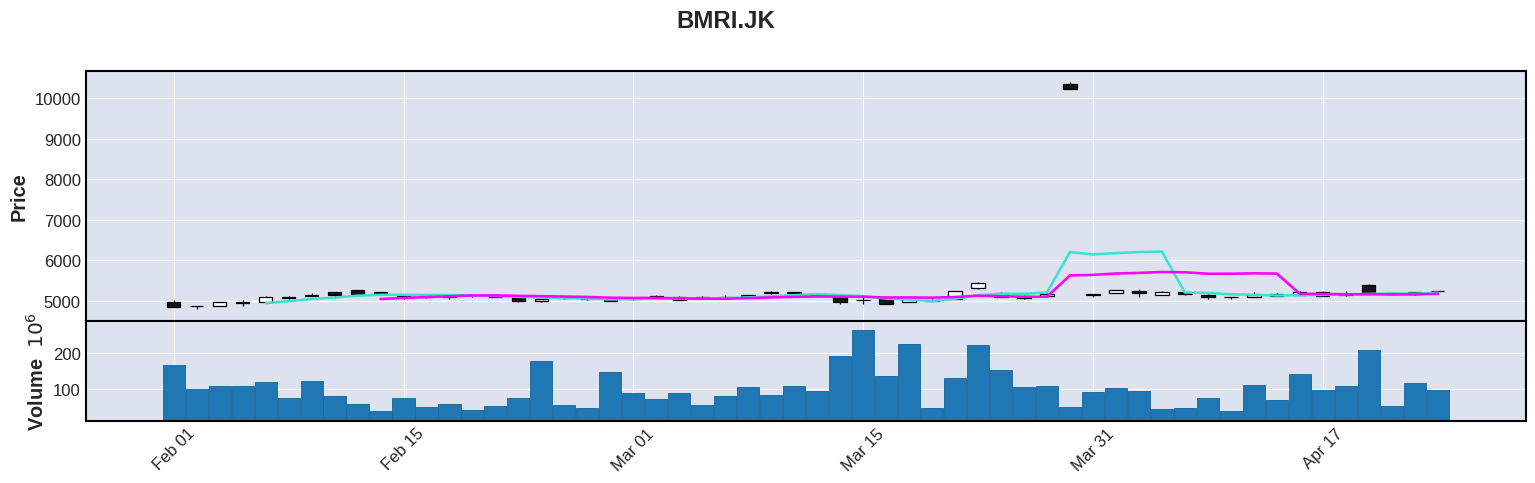


BRPT.JK


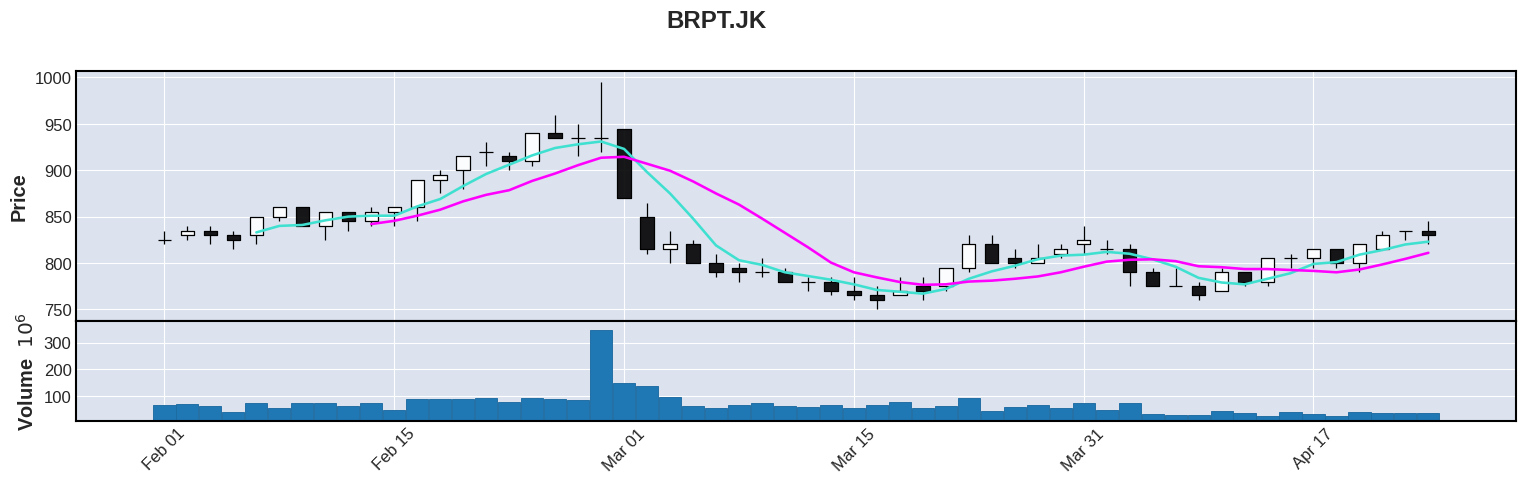


BUKA.JK


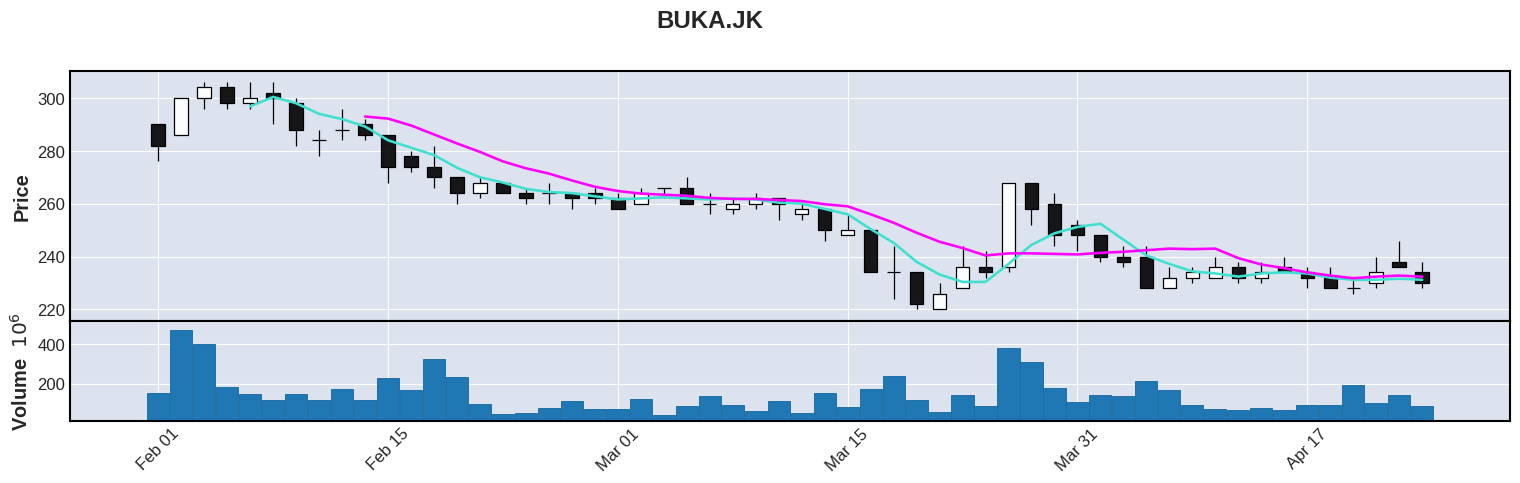


CPIN.JK


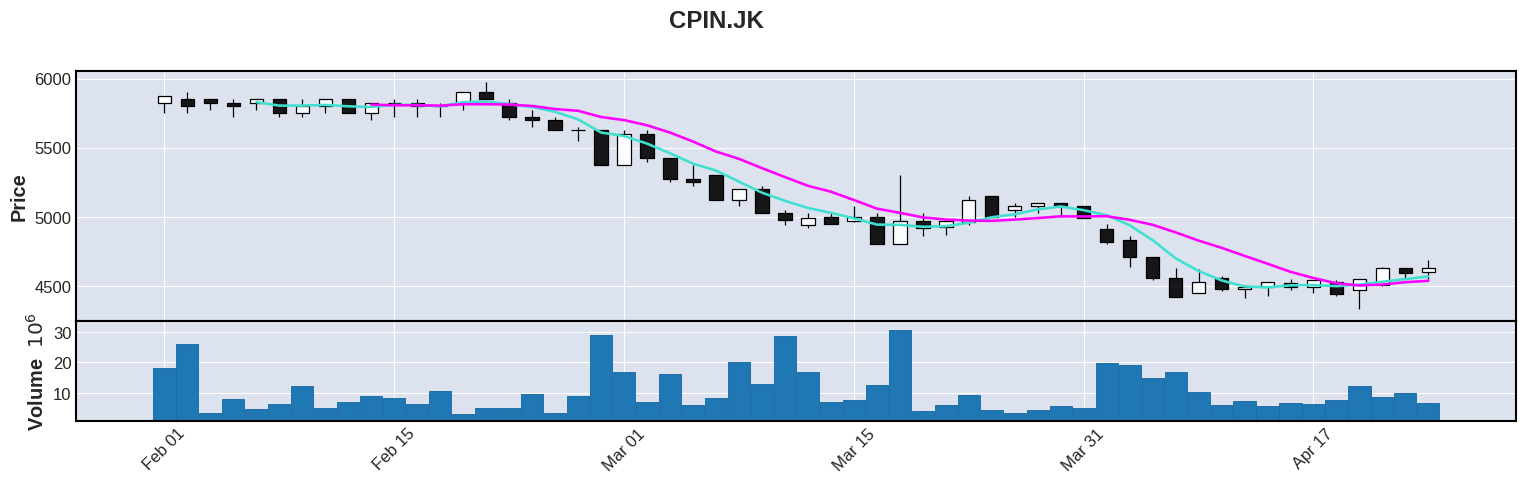


EMTK.JK


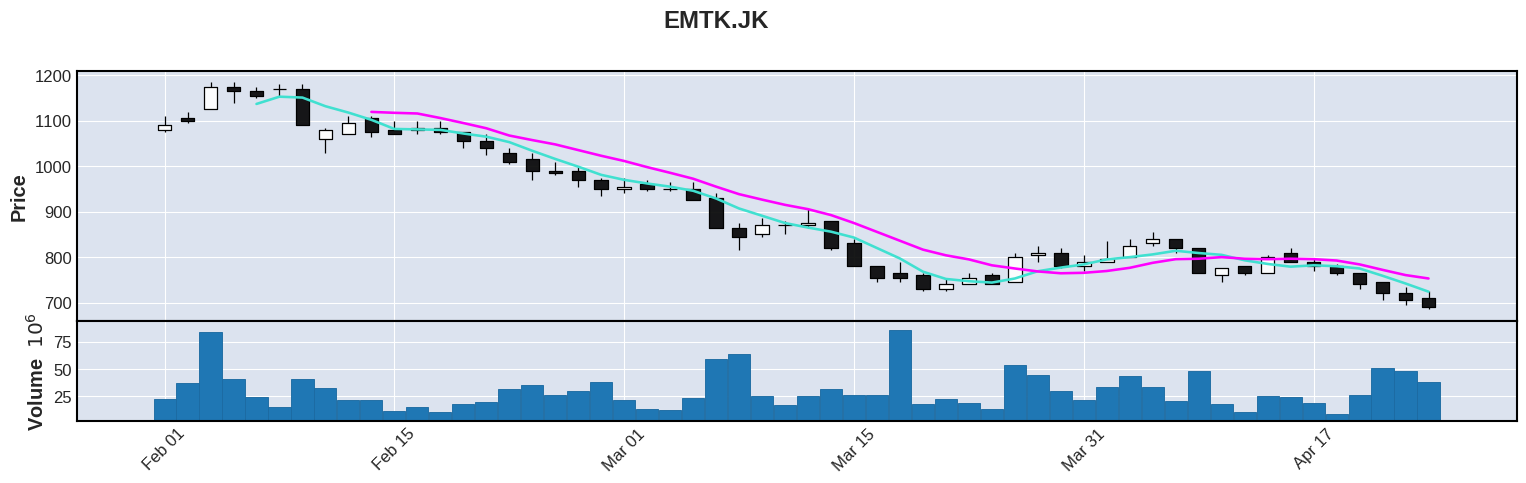


GOTO.JK


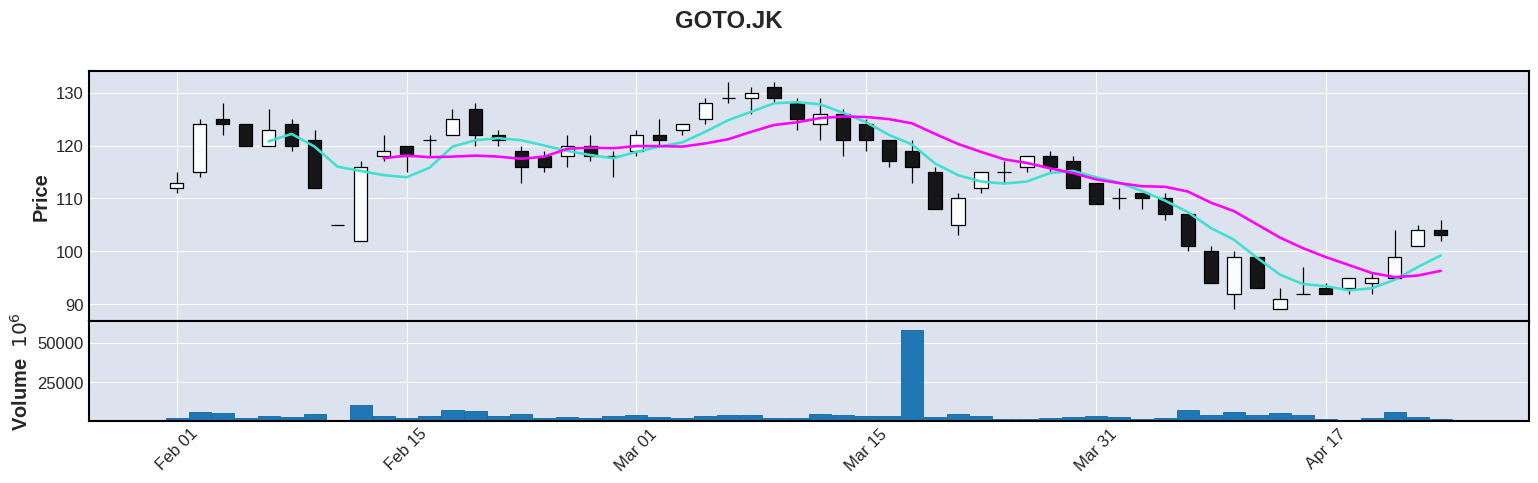


HRUM.JK


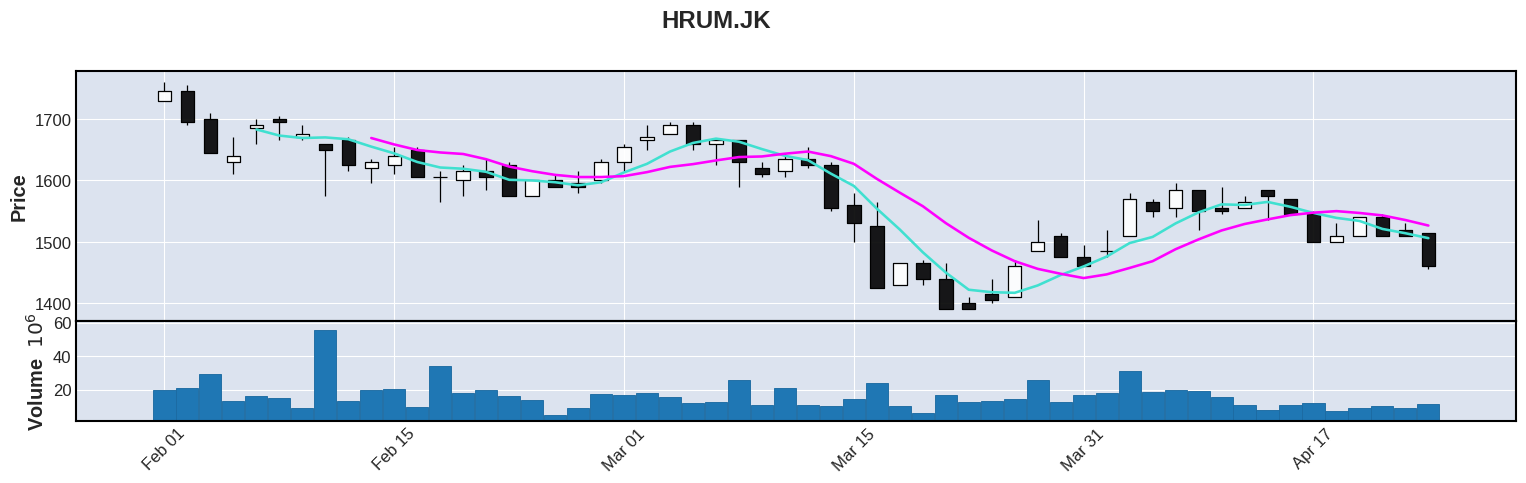


ICBP.JK


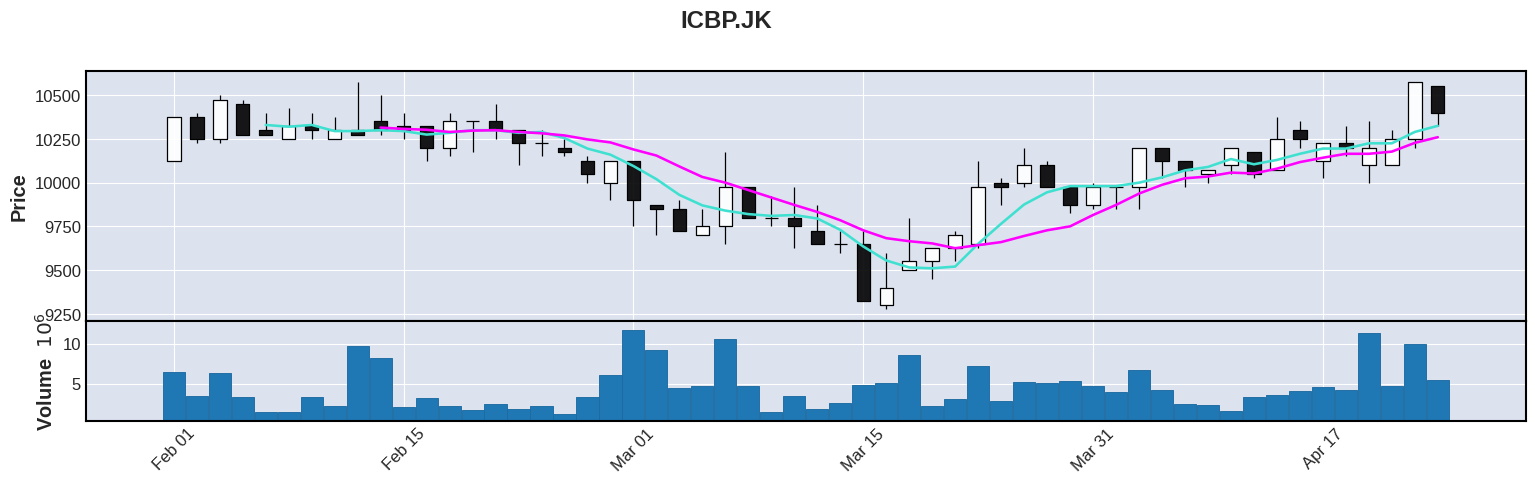


INCO.JK


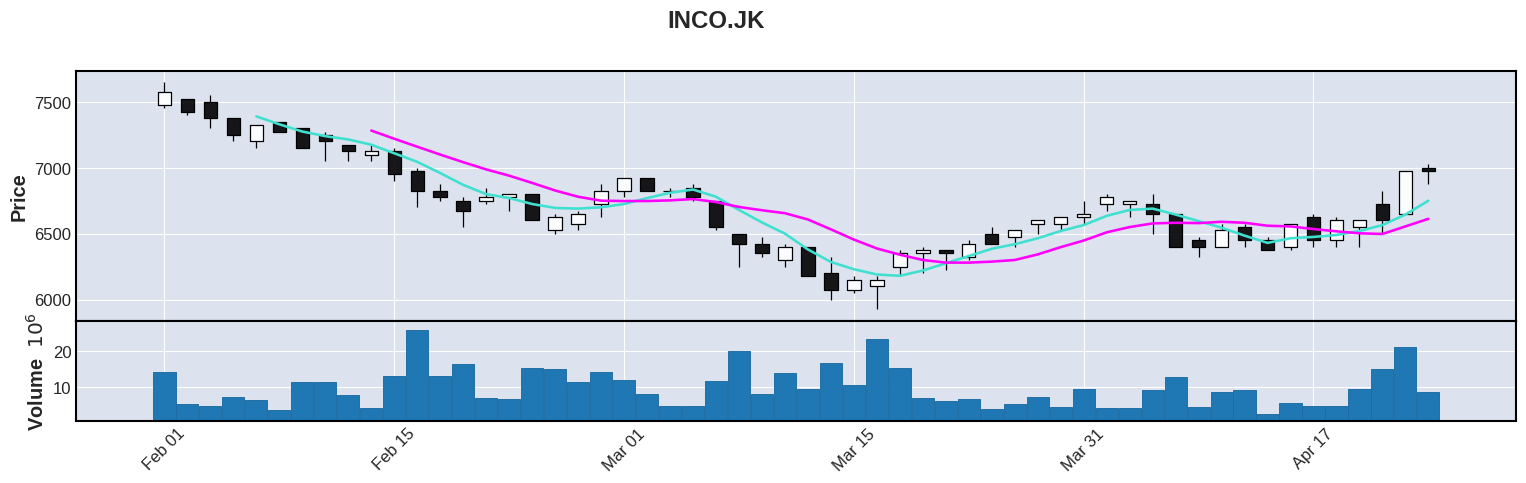


INDF.JK


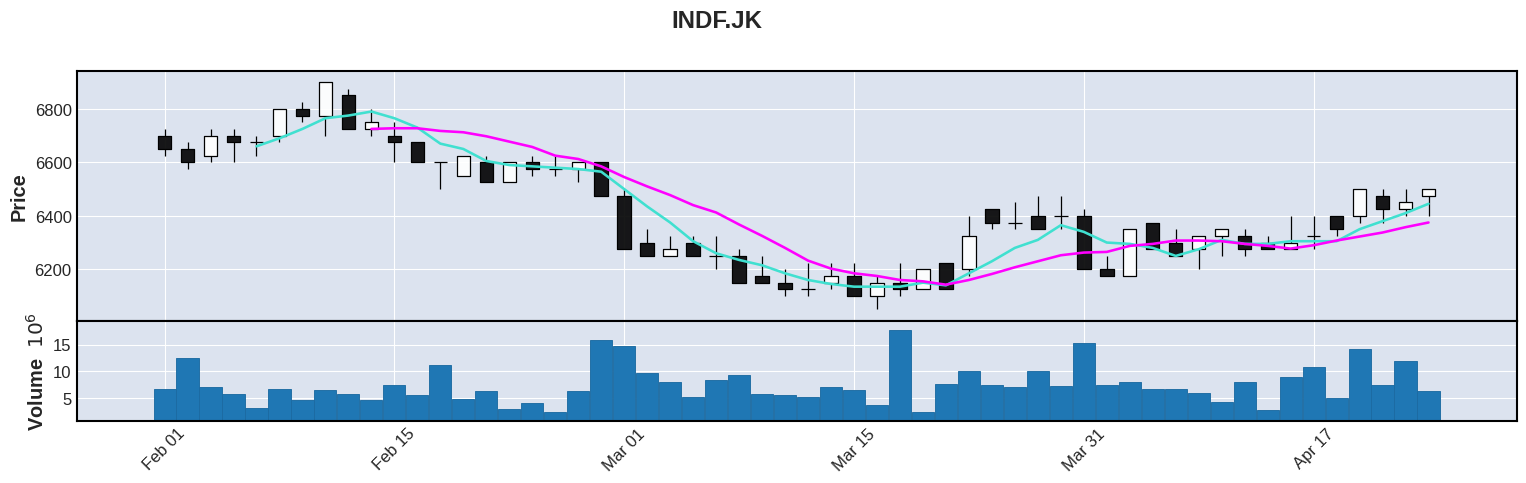


INKP.JK


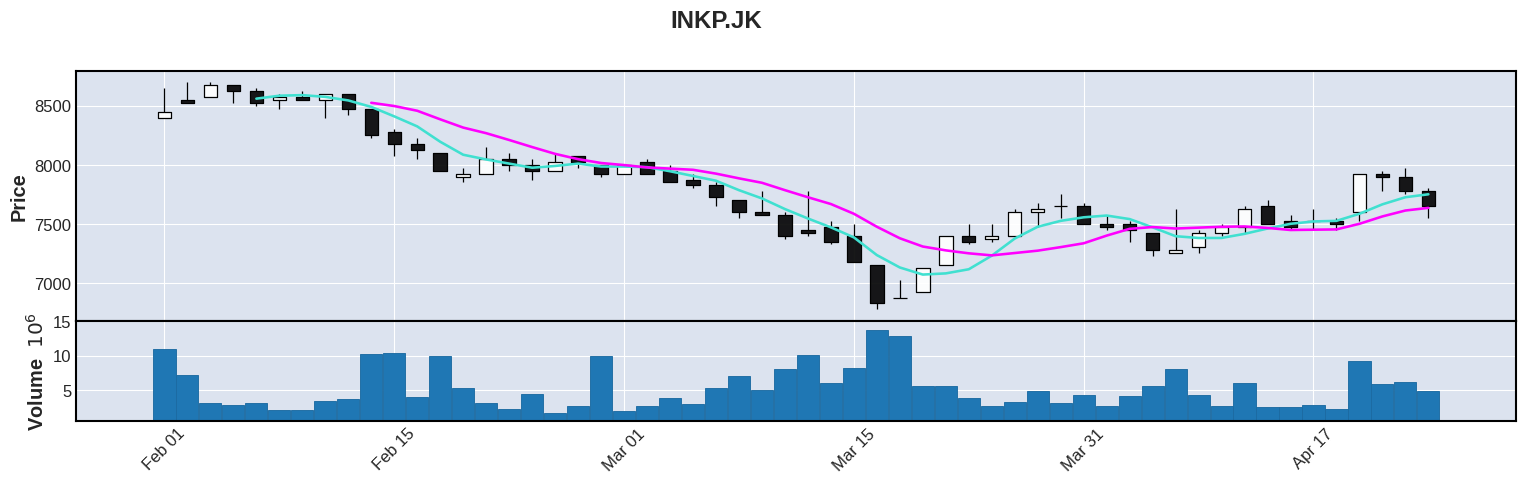


ITMG.JK


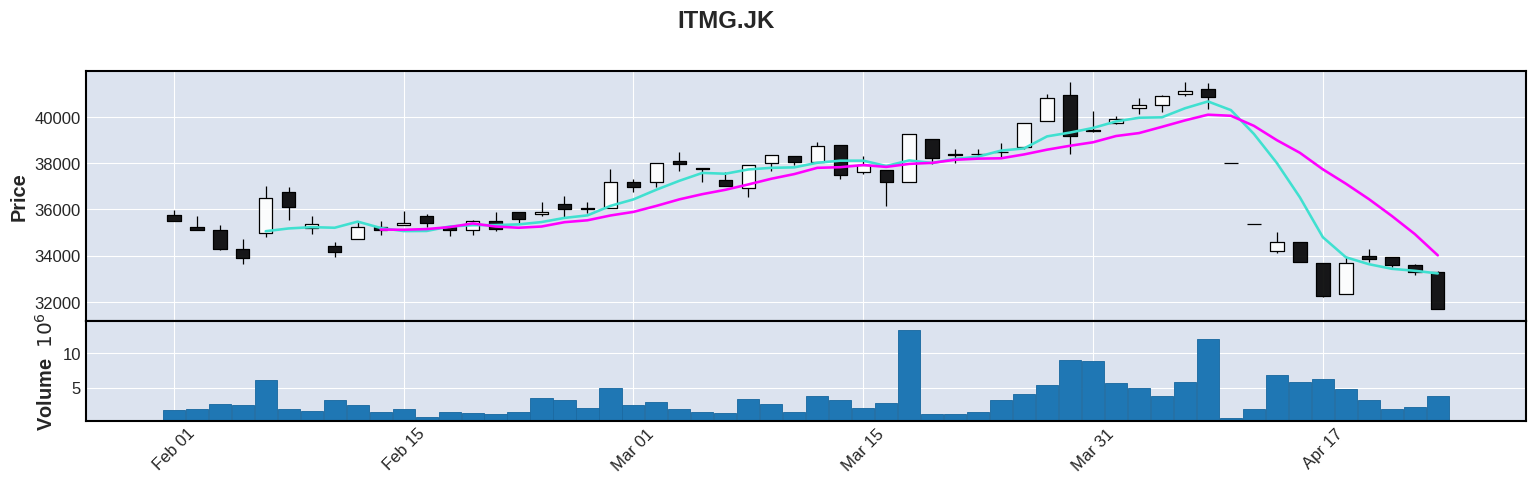


KLBF.JK


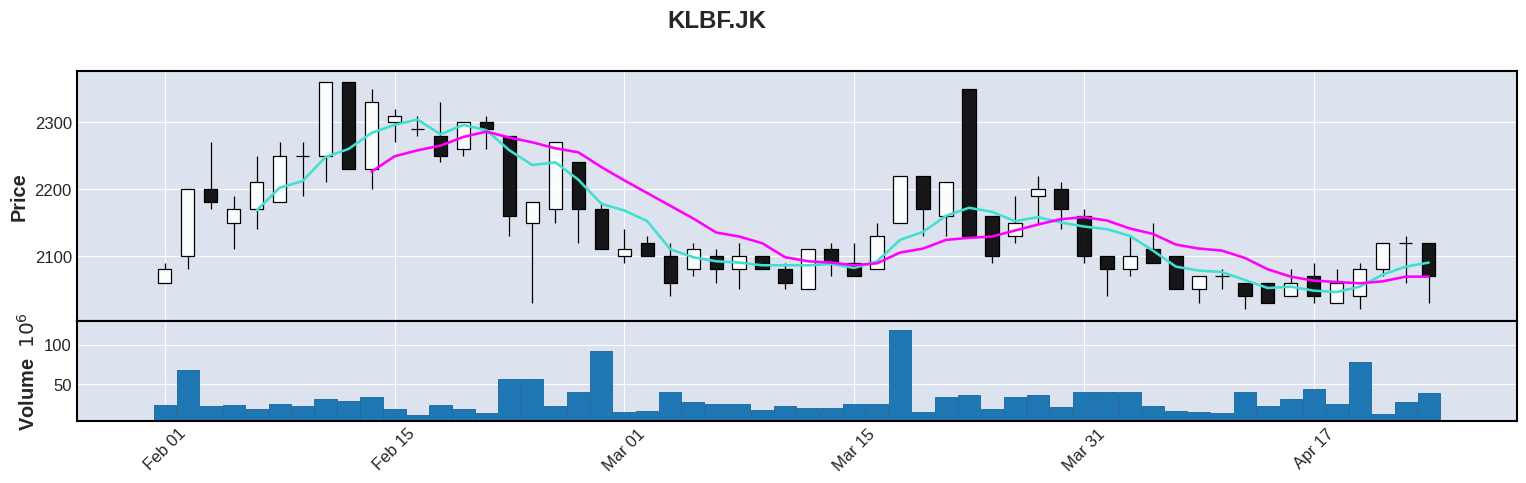


MDKA.JK


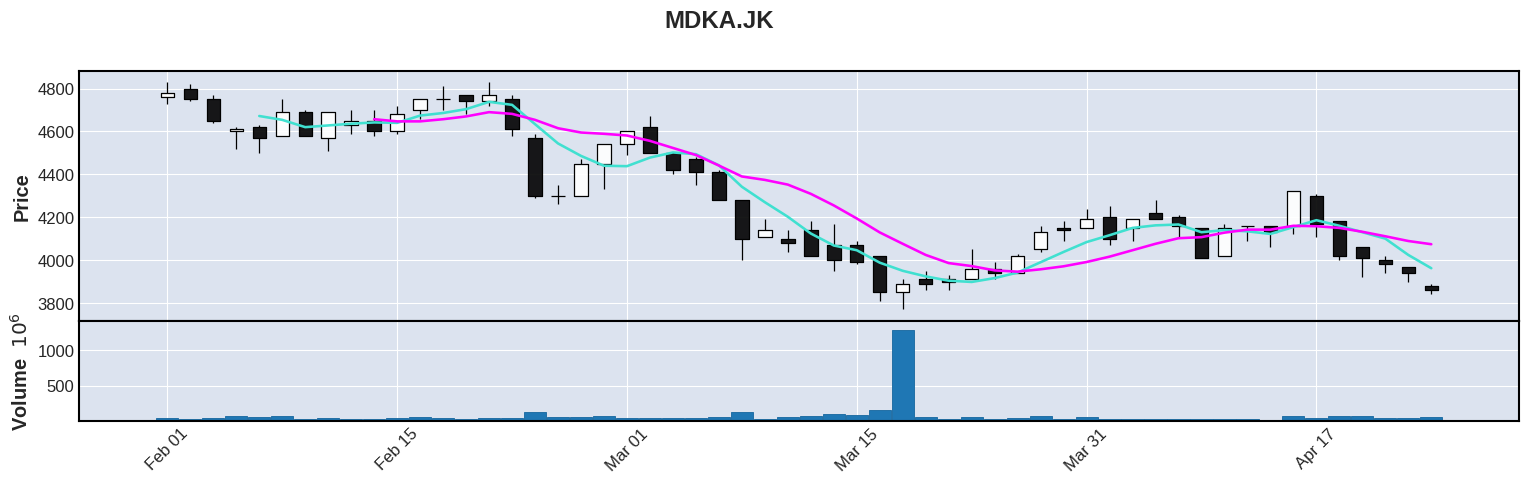


PGAS.JK


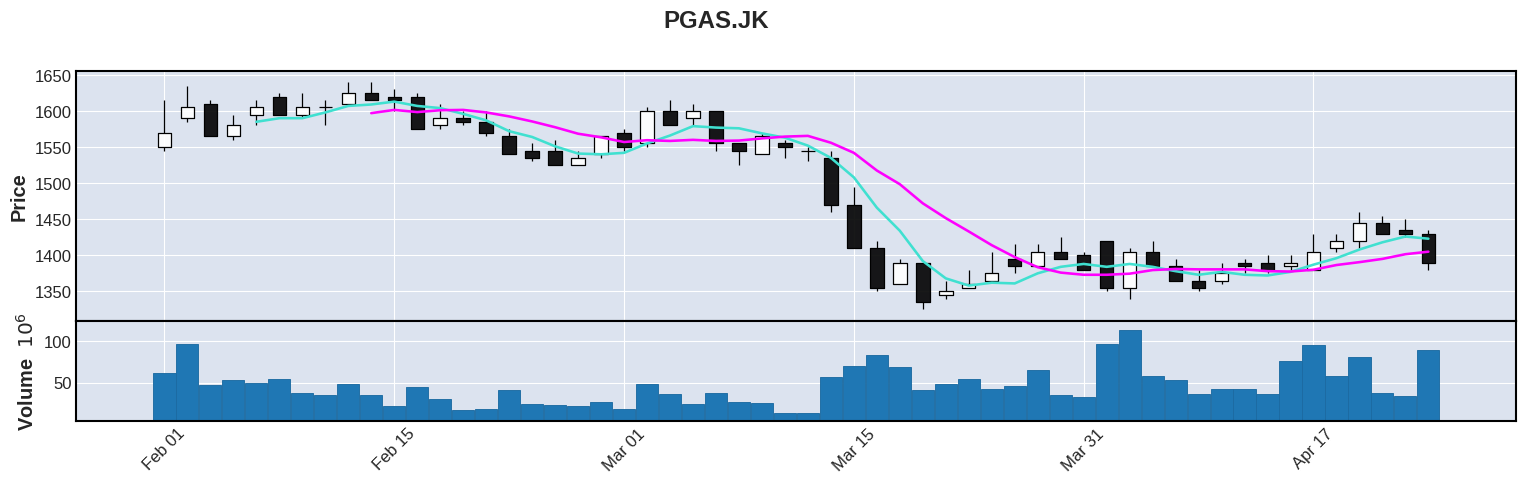


PTBA.JK


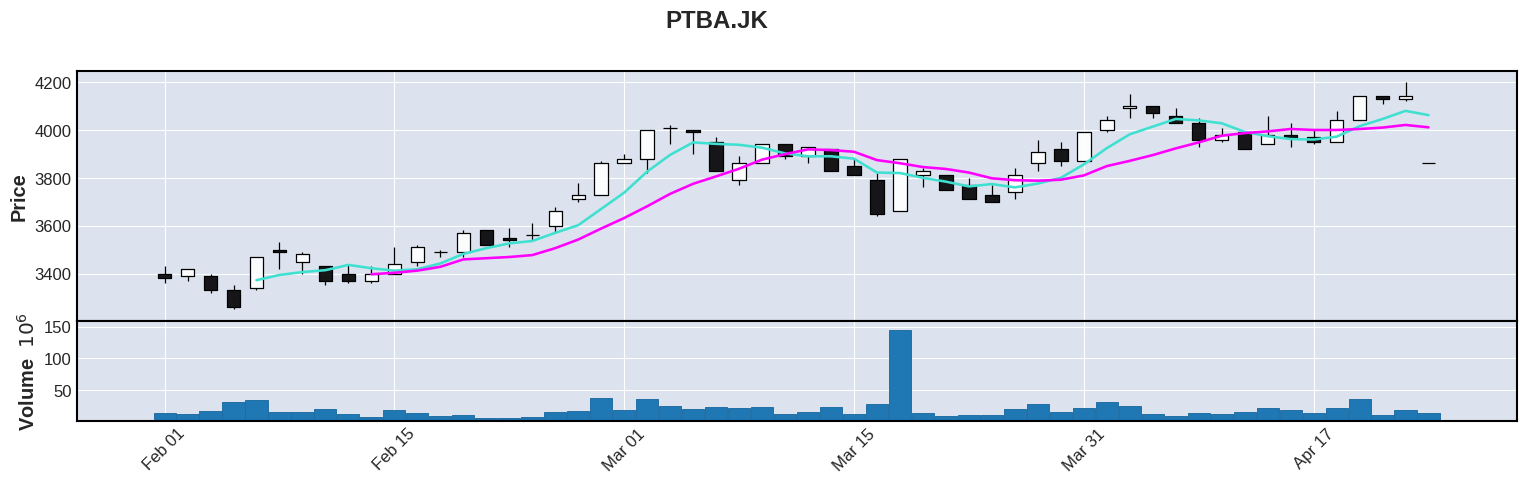


SMGR.JK


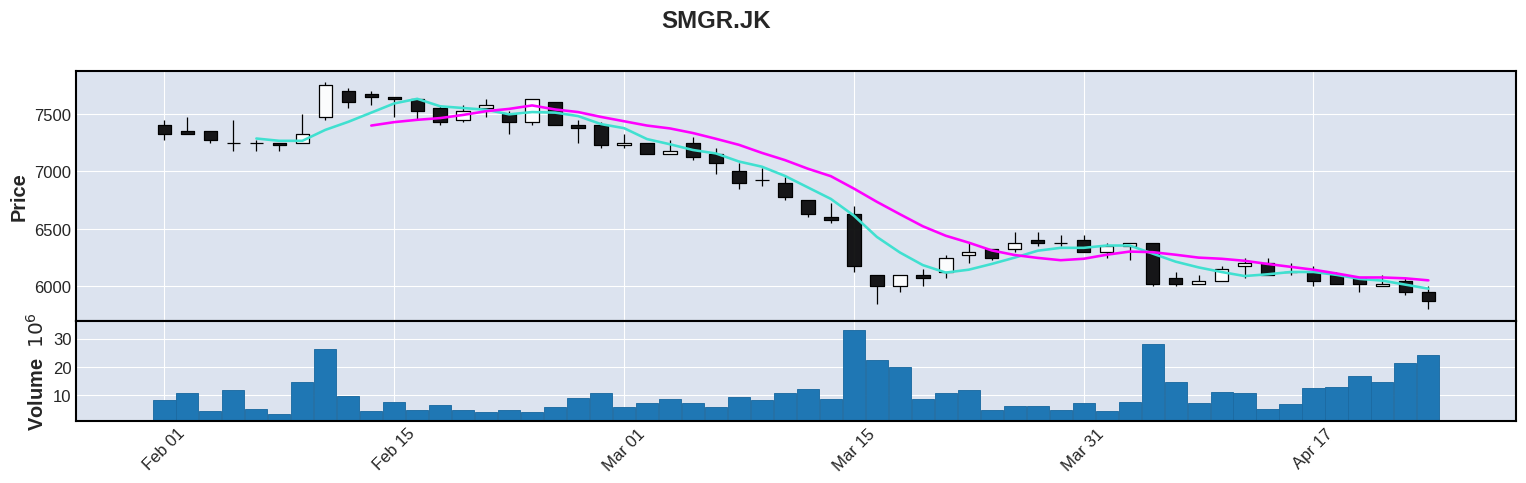


TBIG.JK


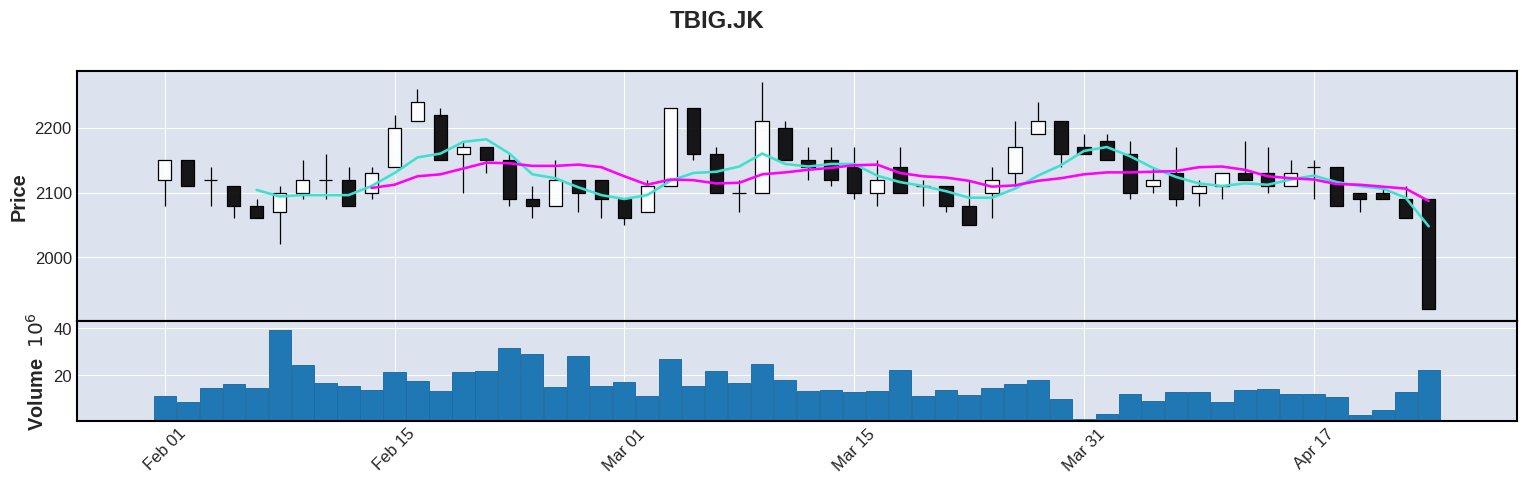


TINS.JK


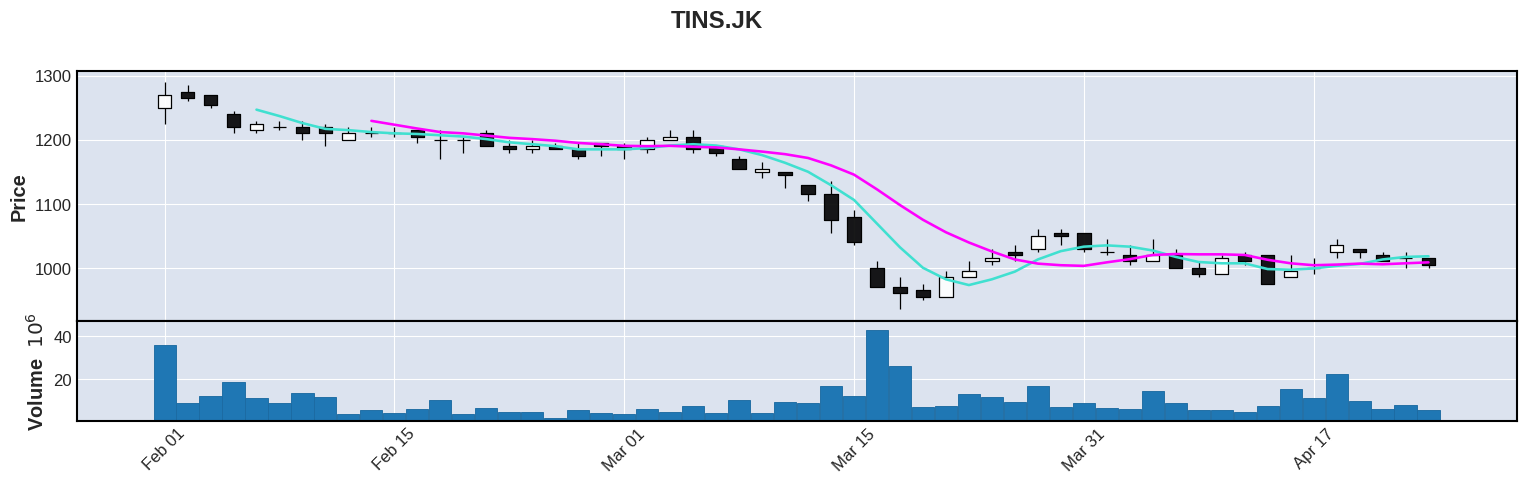


TLKM.JK


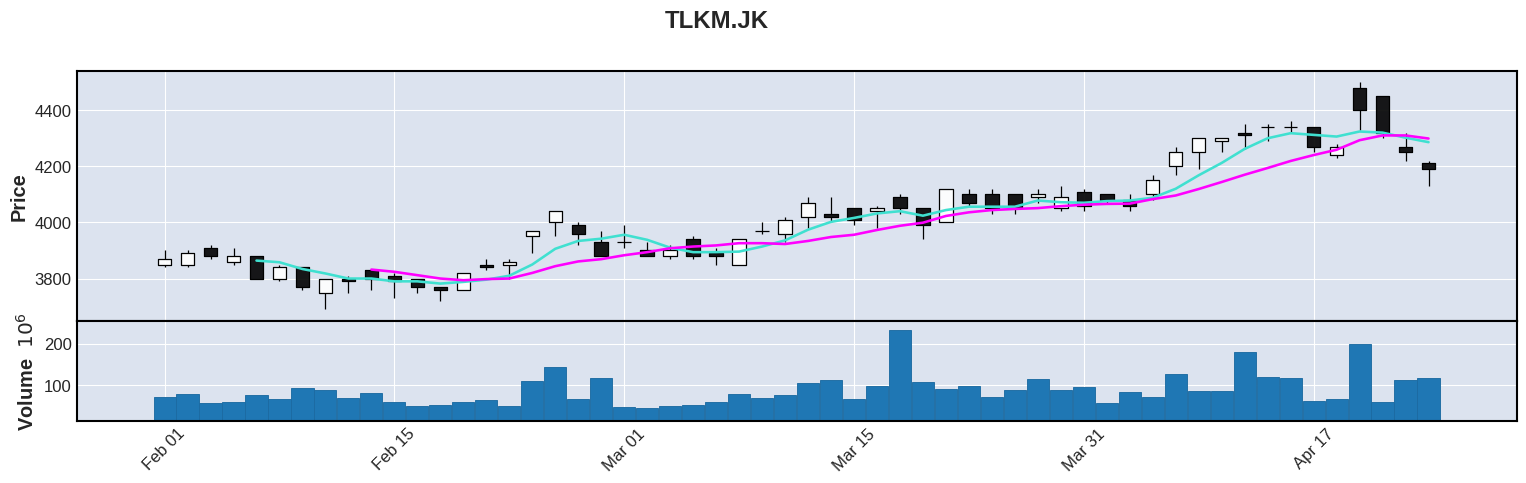


TOWR.JK


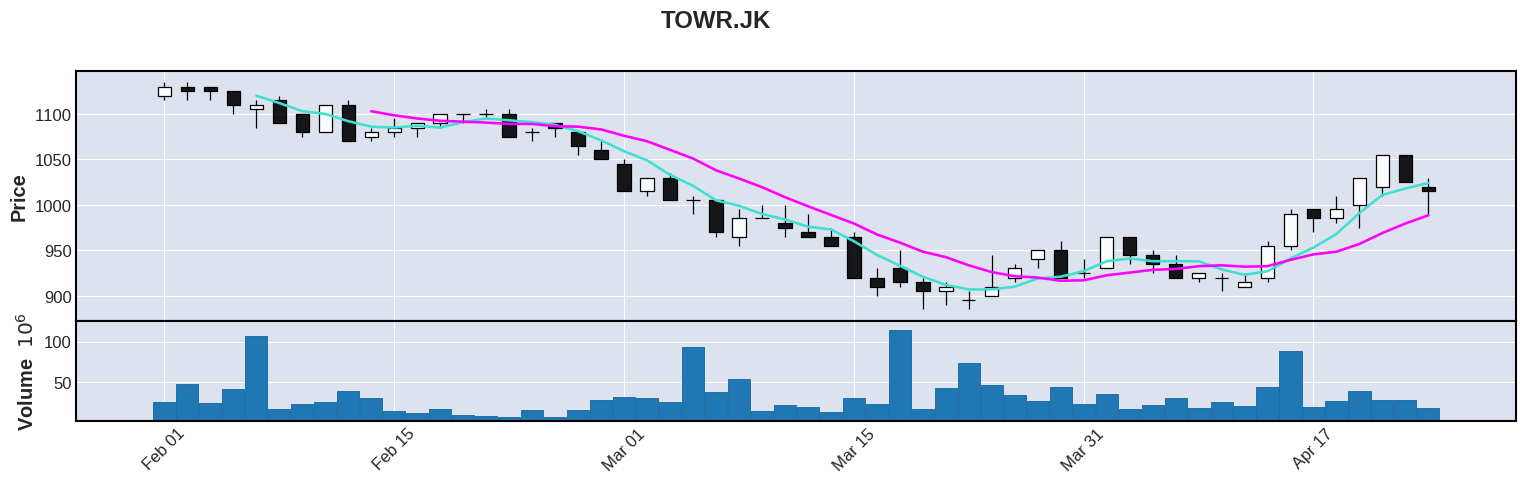


UNTR.JK


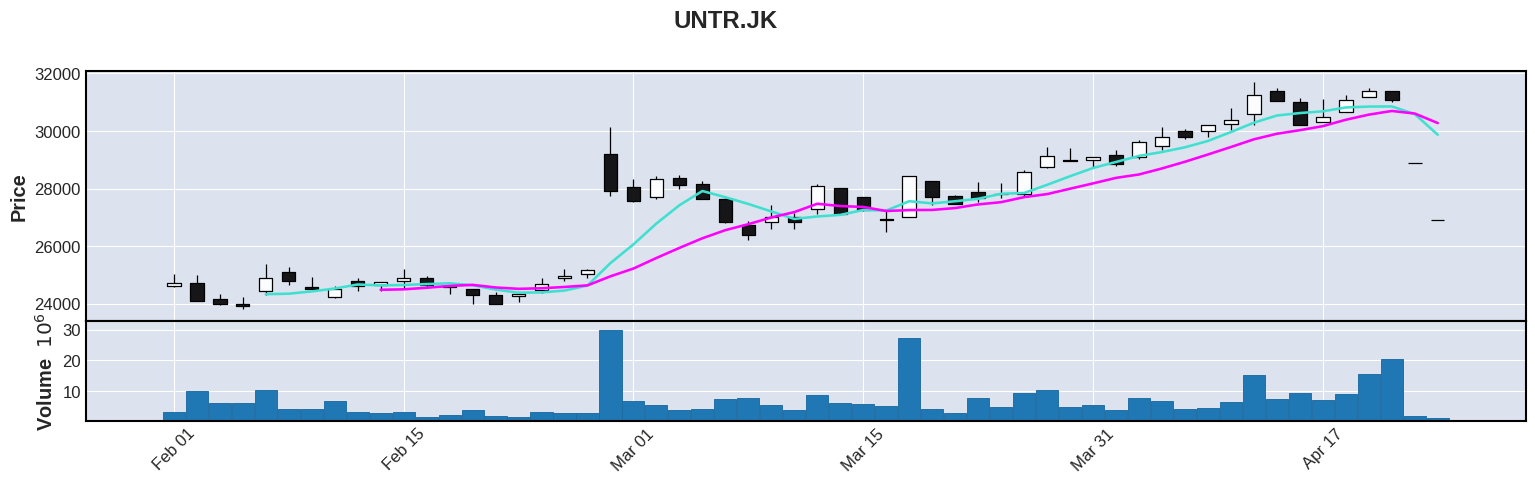


UNVR.JK


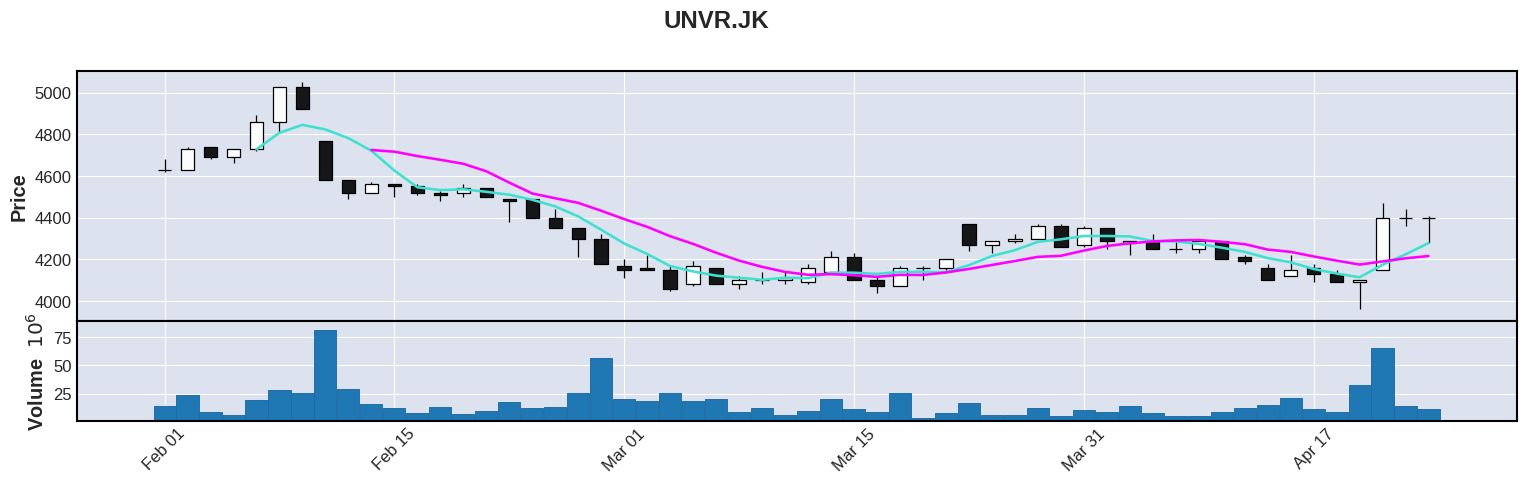

In [ ]:
for tic in tickers:
  print(tic)
  mpf.plot(
      df[df.Tic == tic]['2023-02-01':'2023-05-02'],
      type='candle',
      mav=(5,10),
      volume=True,
      figsize=(20,5),
      title=tic
  )
  print()

# 3. Preprocessing

## 3.1 Input Indicator

In [ ]:
# Function untuk menambahkan Financial indicator
def Insert_Indicator(df, MAV_1 = 10 , MAV_2 = 5):
  df_indicator = pd.DataFrame()
  for tic in tickers:
    Add_Indicator = df[df.Tic == tic].copy()
    Add_Indicator[f'MAV_{MAV_1}'] = TA.SMA(Add_Indicator,MAV_1)
    Add_Indicator[f'MAV_{MAV_2}'] = TA.SMA(Add_Indicator,MAV_2)
    df_indicator = pd.concat([df_indicator,Add_Indicator],axis=0)
  df_indicator = df_indicator.sort_index()
  df_indicator.sort_values(['Date','Tic'],inplace=True)
  df_indicator.dropna(inplace=True)
  return df_indicator

In [ ]:
df_indicator = Insert_Indicator( df, MAV_1 = 3 , MAV_2 = 5)

In [ ]:
df_indicator

,Open,High,Low,Close,Volume,Tic,Return,MAV_3,MAV_5
Date,,,,,,,,,
2020-06-02,1100.000000,1185.000000,1095.000000,1145.00000,123823700,ADRO.JK,4.090909,1091.666667,1055.000000
2020-06-02,540.000000,570.000000,535.000000,555.00000,137754600,ANTM.JK,3.738318,538.333333,533.000000
2020-06-02,746.395508,746.395508,725.662292,729.80896,271062,ARTO.JK,0.571432,733.955587,738.931555
2020-06-02,4760.000000,4950.000000,4630.000000,4730.00000,72425900,ASII.JK,-0.838574,4680.000000,4544.000000
2020-06-02,5260.000000,5500.000000,5240.000000,5360.00000,181369500,BBCA.JK,3.275530,5281.666667,5156.000000
...,...,...,...,...,...,...,...,...,...
2023-05-22,945.000000,965.000000,940.000000,945.00000,4625100,TINS.JK,0.000000,953.333333,964.000000
2023-05-22,4000.000000,4080.000000,3980.000000,4040.00000,115578100,TLKM.JK,0.497512,4016.666667,4002.000000
2023-05-22,1030.000000,1035.000000,1005.000000,1010.00000,15604800,TOWR.JK,-2.415459,1018.333333,1002.000000


In [ ]:
# Fungsi untuk mengubah bentuk candle Open, High, Low, Close menjadi Upper_shadow, Body, Lower_Shadow
def Candlestick_components(df):
  val = df[['Open','High','Low','Close']].values
  sorted_val = []
  for dat in val:
    sorted_val.append(np.sort(dat))
  sorted_val = np.array(sorted_val)
  df['upper_shadow'] = sorted_val[:,3] - sorted_val[:,2]
  df['body'] = sorted_val[:,2] - sorted_val[:,1]
  df['lower_shadow'] = sorted_val[:,1] - sorted_val[:,0]
  return df

In [ ]:
df_indicator = Candlestick_components(df_indicator)
df_indicator

,Open,High,Low,Close,Volume,Tic,MAV_3,MAV_5,upper_shadow,body,lower_shadow
Date,,,,,,,,,,,
2020-06-02,1100.000000,1185.000000,1095.000000,1145.00000,123823700,ADRO.JK,1091.666667,1055.000000,40.0,45.000000,5.000000
2020-06-02,540.000000,570.000000,535.000000,555.00000,137754600,ANTM.JK,538.333333,533.000000,15.0,15.000000,5.000000
2020-06-02,746.395508,746.395508,725.662292,729.80896,271062,ARTO.JK,733.955587,738.931555,0.0,16.586548,4.146667
2020-06-02,4760.000000,4950.000000,4630.000000,4730.00000,72425900,ASII.JK,4680.000000,4544.000000,190.0,30.000000,100.000000
2020-06-02,5260.000000,5500.000000,5240.000000,5360.00000,181369500,BBCA.JK,5281.666667,5156.000000,140.0,100.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,945.000000,965.000000,940.000000,945.00000,4625100,TINS.JK,953.333333,964.000000,20.0,0.000000,5.000000
2023-05-22,4000.000000,4080.000000,3980.000000,4040.00000,115578100,TLKM.JK,4016.666667,4002.000000,40.0,40.000000,20.000000
2023-05-22,1030.000000,1035.000000,1005.000000,1010.00000,15604800,TOWR.JK,1018.333333,1002.000000,5.0,20.000000,5.000000


 Label Trend

In [ ]:
# Proses melakukan labeling berdasarkan pergerakan Trend naik / turun dari hasil perhitungan MAV_3 dan MAV_5

trend = []
for val in df_indicator[['MAV_3','MAV_5']].values:
  if val[0] <= val[1]:
    trend.append('turun')
  else:
    trend.append('naik')

In [ ]:
df_indicator['Trend'] = trend
df_indicator

,Open,High,Low,Close,Volume,Tic,MAV_3,MAV_5,upper_shadow,body,lower_shadow,Trend
Date,,,,,,,,,,,,
2020-06-02,1100.000000,1185.000000,1095.000000,1145.00000,123823700,ADRO.JK,1091.666667,1055.000000,40.0,45.000000,5.000000,naik
2020-06-02,540.000000,570.000000,535.000000,555.00000,137754600,ANTM.JK,538.333333,533.000000,15.0,15.000000,5.000000,naik
2020-06-02,746.395508,746.395508,725.662292,729.80896,271062,ARTO.JK,733.955587,738.931555,0.0,16.586548,4.146667,turun
2020-06-02,4760.000000,4950.000000,4630.000000,4730.00000,72425900,ASII.JK,4680.000000,4544.000000,190.0,30.000000,100.000000,naik
2020-06-02,5260.000000,5500.000000,5240.000000,5360.00000,181369500,BBCA.JK,5281.666667,5156.000000,140.0,100.000000,20.000000,naik
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,945.000000,965.000000,940.000000,945.00000,4625100,TINS.JK,953.333333,964.000000,20.0,0.000000,5.000000,turun
2023-05-22,4000.000000,4080.000000,3980.000000,4040.00000,115578100,TLKM.JK,4016.666667,4002.000000,40.0,40.000000,20.000000,naik
2023-05-22,1030.000000,1035.000000,1005.000000,1010.00000,15604800,TOWR.JK,1018.333333,1002.000000,5.0,20.000000,5.000000,naik


## 3.2 Dataset Batching

Memisahkan data menjadi data Input dan Output

In [ ]:
# mendapatkan kolom input
input = pd.DataFrame()
for tic in tickers:
  temp_df = df_indicator[df_indicator.Tic == tic].drop(['Trend'],axis=1).shift(-1).dropna()
  input = pd.concat([input, temp_df],axis=0)
input.sort_values(['Date','Tic'],inplace=True)
input

,Open,High,Low,Close,Volume,Tic,MAV_3,MAV_5,upper_shadow,body,lower_shadow
Date,,,,,,,,,,,
2020-06-02,1155.00000,1180.000000,1150.000000,1165.00000,89675400.0,ADRO.JK,1136.666667,1088.000000,15.000000,10.0,5.000000
2020-06-02,565.00000,580.000000,545.000000,555.00000,147855500.0,ANTM.JK,548.333333,538.000000,15.000000,10.0,10.000000
2020-06-02,729.80896,746.395508,725.662292,729.80896,165917.0,ARTO.JK,728.426737,735.614246,16.586548,0.0,4.146667
2020-06-02,4750.00000,4950.000000,4680.000000,4890.00000,76654100.0,ASII.JK,4796.666667,4656.000000,60.000000,140.0,70.000000
2020-06-02,5410.00000,5780.000000,5400.000000,5780.00000,279673500.0,BBCA.JK,5443.333333,5318.000000,0.000000,370.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19,945.00000,965.000000,940.000000,945.00000,4625100.0,TINS.JK,953.333333,964.000000,20.000000,0.0,5.000000
2023-05-19,4000.00000,4080.000000,3980.000000,4040.00000,115578100.0,TLKM.JK,4016.666667,4002.000000,40.000000,40.0,20.000000
2023-05-19,1030.00000,1035.000000,1005.000000,1010.00000,15604800.0,TOWR.JK,1018.333333,1002.000000,5.000000,20.0,5.000000


Categorical Output

In [ ]:
# mendapatkan kolom output / target
output = pd.DataFrame()
for tic in tickers:
  temp_df = df_indicator[df_indicator.Tic == tic][['Trend','Tic']].shift(-1).dropna()
  output = pd.concat([output, temp_df],axis=0)
output.sort_values(['Date','Tic'],inplace=True)
output

,Trend,Tic
Date,,
2020-06-02,naik,ADRO.JK
2020-06-02,naik,ANTM.JK
2020-06-02,turun,ARTO.JK
2020-06-02,naik,ASII.JK
2020-06-02,naik,BBCA.JK
...,...,...
2023-05-19,turun,TINS.JK
2023-05-19,naik,TLKM.JK
2023-05-19,naik,TOWR.JK


In [ ]:
# Mengubah Output Kata Kata menjadi bentuk OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(output.Trend.values.reshape(-1,1))

output_categorical = pd.DataFrame(df_encoded.toarray(),columns=encoder.get_feature_names_out(), index=output.index)
output_categorical['Tic'] = output['Tic']
output_categorical

,x0_naik,x0_turun,Tic
Date,,,
2020-06-02,1.0,0.0,ADRO.JK
2020-06-02,1.0,0.0,ANTM.JK
2020-06-02,0.0,1.0,ARTO.JK
2020-06-02,1.0,0.0,ASII.JK
2020-06-02,1.0,0.0,BBCA.JK
...,...,...,...
2023-05-19,0.0,1.0,TINS.JK
2023-05-19,1.0,0.0,TLKM.JK
2023-05-19,1.0,0.0,TOWR.JK


Batching data dengan ukuran 5 hari

In [ ]:
input_batches = []
output_batches_categorical = []

for tic in tickers:
  start = 0
  end = loopback = 5
  while end < input[input.Tic == tic].shape[0]:
    input_batches.append(input[input.Tic == tic].loc[:, input.columns != 'Tic'].values[start:end])
    output_batches_categorical.append(output_categorical[output_categorical.Tic == tic].loc[:, output_categorical.columns != 'Tic'].values[end])
    start += 1
    end += 1

input_batches = np.array(input_batches)
output_batches_categorical = np.array(output_batches_categorical)
features = input.drop('Tic',axis=1).columns

In [ ]:
print('jumlah batch :',input_batches.shape[0])
print('Time Frame :',input_batches.shape[1],'hari')
print('jumlah feature :',input_batches.shape[2])
print('feature :',features)

jumlah batch : 20819
Time Frame : 5 hari
jumlah feature : 10
feature : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MAV_3', 'MAV_5',
       'upper_shadow', 'body', 'lower_shadow'],
      dtype='object')


## 3.3 Gramian Angular Field

contoh visual hasil Gramian Angular Field pada salah satu batch

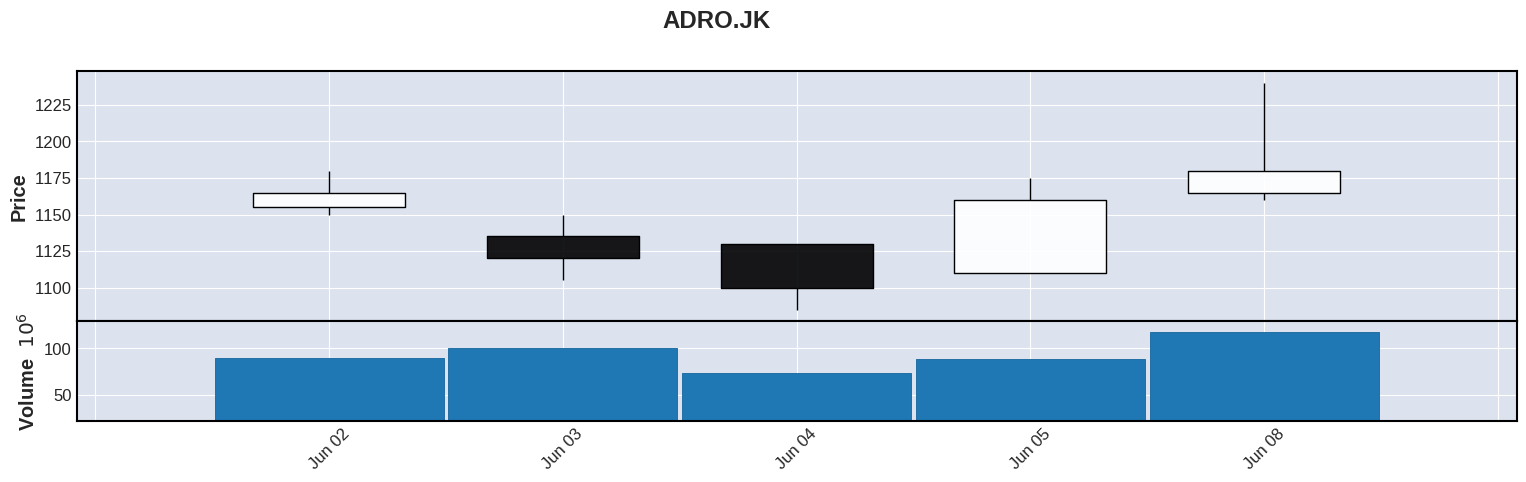

In [ ]:
mpf.plot(
      input[input.Tic=='ADRO.JK'][:loopback],
      type='candle',
      volume=True,
      figsize=(20,5),
      title='ADRO.JK'
  )

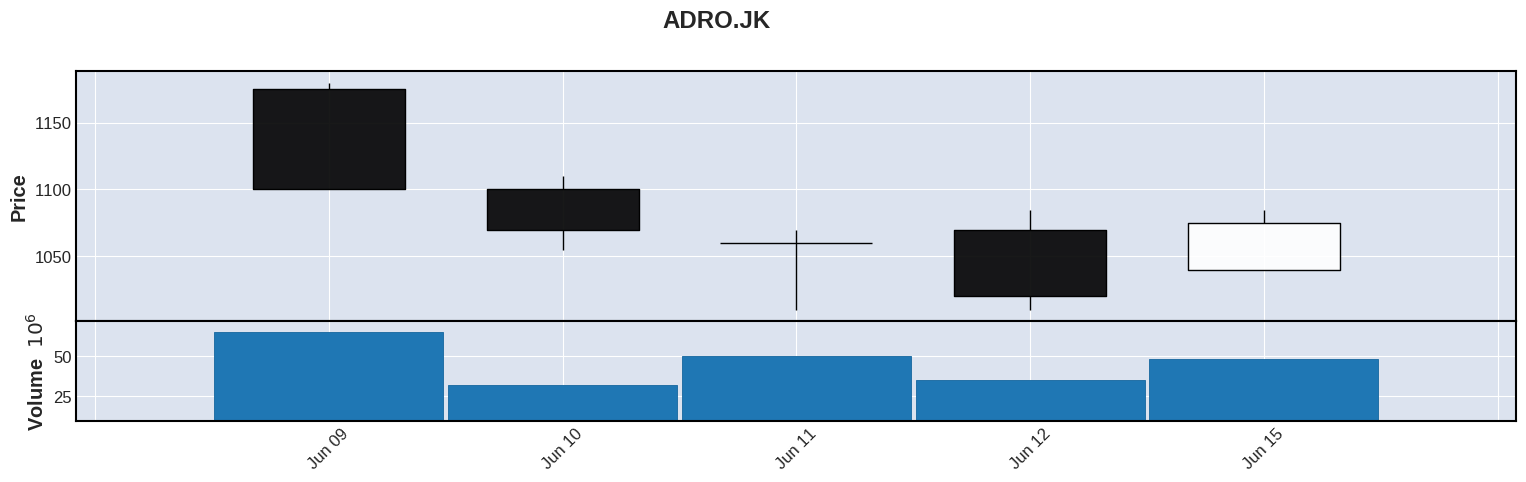

In [ ]:
mpf.plot(
      input[input.Tic=='ADRO.JK'][loopback:loopback+loopback],
      type='candle',
      volume=True,
      figsize=(20,5),
      title='ADRO.JK'
  )

Contoh Proses perubahan data menjadi GAF pada sebuah data

In [ ]:
input_batches[0].shape

(5, 10)

In [ ]:
# Mengubah manjadii bentuk GAF
gasf = GramianAngularField(method='s')
GAF = gasf.transform(input_batches[0].T)
GAF.shape

(10, 5, 5)

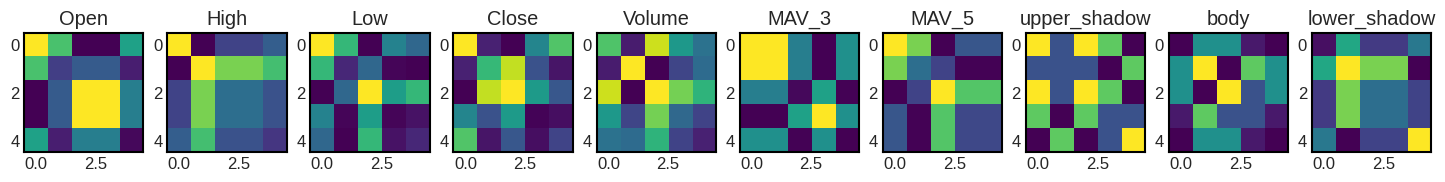

In [ ]:
# Ploting visual hasil GAF pada setiap fitur
plt.figure(figsize=(20,10))
for idx,i in enumerate(GAF):
  plt.subplot(1,11,idx+1), plt.imshow(i, cmap='viridis'), plt.title(features[idx]), plt.grid(None)

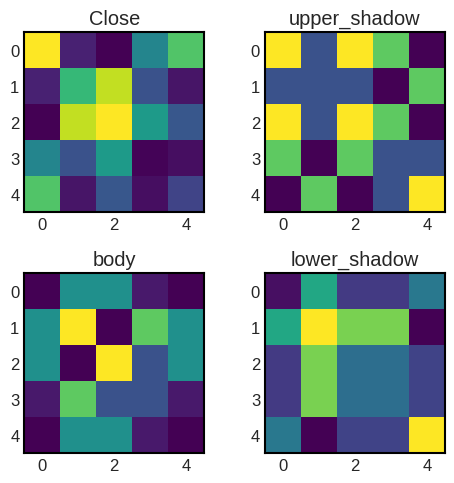

In [ ]:
# Mengambil fitur yang akan di gunakan saja, yaitu upper dan lower shadow, body, dan nilai Close

plt.figure(figsize=(5,5))
for idx,i in enumerate([3,7,8,9]):
  plt.subplot(2,2,idx+1), plt.imshow(GAF[i], cmap='viridis'), plt.title(features[i]), plt.grid(None)
plt.tight_layout()

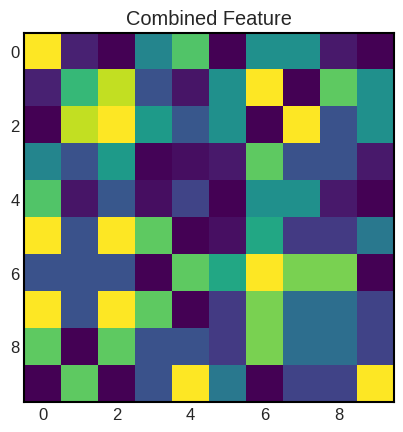

In [ ]:
# lalu Menyatukan 4 fitur yang sudah dipilih sebelumnya menjadi 1 image, berikut adalah contoh visual nya

first = np.concatenate([GAF[3],GAF[8]],axis=1)
second = np.concatenate([GAF[7],GAF[9]],axis=1)
last = np.concatenate([first,second], axis=0)
plt.imshow(last, cmap='viridis'), plt.title('Combined Feature'), plt.grid(None);

Proses Mengubah keseluruhan batch data kedalam bentuk GAF

In [ ]:
# Pembuatan temporary Folder yang digunakan untuk menyimpan gambar GAF
!rm -rf results
!mkdir 'results'
!mkdir 'results/combine_features'

In [ ]:
# Proses Merubah data Batch menjadi bentuk GAF dan menyimpan nya
for idx,i in enumerate(input_batches):
  gasf = GramianAngularField(method='summation')
  GAF = gasf.transform(i.T)

  first = np.concatenate([GAF[3],GAF[8]],axis=1)
  second = np.concatenate([GAF[7],GAF[9]],axis=1)
  last = np.concatenate([first,second], axis=0)
  plt.imsave(f'results/combine_features/batch_{idx}.bmp', last, cmap='viridis')

In [ ]:
# Proses pembacaan gambar yang sudah di ubah menjadi bentuk GAF
gaf_batches_1 = []

for i in range(len(os.listdir('results/combine_features/'))):
  gaf_batches_1.append(plt.imread(f'results/combine_features/batch_{i}.bmp')/255.)
gaf_batches_1 = np.array(gaf_batches_1)

In [ ]:
gaf_batches_1.shape

(20819, 10, 10, 3)

## 3.4 Data Train & Test

Train & Test Spliting, pemisahan data yang akan menjadi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(gaf_batches_1, output_batches_categorical, test_size=0.1)
x_train.shape, x_test.shape

((18735, 10, 10, 3), (2082, 10, 10, 3))

In [ ]:
# Menampilkan jenis dan jumlah output pada Label Train

np.unique(np.argmax(y_train,axis=1), return_counts=True)

(array([0, 1]), array([9138, 9597]))

In [ ]:
# Menampilkan jenis dan jumlah output pada Label Test

np.unique(np.argmax(y_test,axis=1), return_counts=True)

(array([0, 1]), array([1041, 1041]))

# 3. CNN Arcitecture

## Categorical Classification

Proses Tuning Arsitektur CNN agar didapatkan arsitektur yang baik dalam menangani kasus permasalahan ini, digunakan Keras Tuner untuk melakukan pembuatan arsitektur secara otomatis dengan melakukan percobaan pada setiap arsitektur nya

In [ ]:
# Pendefinisian Model Arsitektur yang akan di Tuning

def build_model(hp):
  params = {
    'activation' : 'relu',
    'padding' : "same"
  }
  model = keras.Sequential()
  model.add(
    Input(shape=x_train.shape[1:])
    )
  for i in range(0,hp.Int('num_layers', 2, 5)):
    model.add(
      Conv2D(
          hp.Choice(f"units {i+1}", [32, 64, 128, 256, 512]),
          3, **params)
      )

  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())

  for i in range(0,hp.Int('num_dense_layers', 1, 3)):
    model.add(Dense(
        hp.Choice(f"Dense {i+1}", [8, 16, 32, 64, 128, 256, 512]),
        activation='relu'))

  model.add(Dense(y_train.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

stop_early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
# Pendefinisian KerasTuner

!rm -rf untitled_project

tuner = keras_tuner.Hyperband(
    build_model,
    objective = keras_tuner.Objective("val_accuracy", direction="max"),
    max_epochs=20,
    project_name='hyperband_tuner',
    factor=5,
    overwrite=True)

In [ ]:
# Melakukan proses Search untuk mencari arsitektur terbaik
tuner.search(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), callbacks=[stop_early], use_multiprocessing = True);

Trial 13 Complete [00h 00m 13s]
val_accuracy: 0.5386779308319092

Best val_accuracy So Far: 0.952180027961731
Total elapsed time: 00h 03m 50s


In [ ]:
# Best Model yang didapatkan berdasarkan pencarian diatas

best_model = tuner.get_best_models()[0]
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units 1': 32,
 'units 2': 256,
 'num_dense_layers': 1,
 'Dense 1': 512,
 'units 3': 32,
 'Dense 2': 8,
 'Dense 3': 32,
 'units 4': 512,
 'units 5': 256,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0005'}

In [ ]:
# Merekayasa ulang model yang didapatkan berdasarkan hasil Tuning diatas

# Model

keras.backend.clear_session()
# Create a Sequential model
params = {
  'activation' : 'relu',
  'padding' : "same"
}
model = Sequential()
model.add(
    Input(shape=x_train.shape[1:])
    )
# Add the convolutional layers
model.add(Conv2D(32,3, **params))
model.add(Conv2D(256,3, **params))
# Flatten the output and add fully connected layers

model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 10, 10, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 256)       73984     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 256)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 512)               3277312   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                        

In [ ]:
# Melakukan Training pada Model

model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), use_multiprocessing = True);

Epoch 1/20
586/586 [==============================] - 5s 5ms/step - loss: 0.6936 - accuracy: 0.5193 - val_loss: 0.6844 - val_accuracy: 0.5736
Epoch 2/20
586/586 [==============================] - 3s 5ms/step - loss: 0.6869 - accuracy: 0.5436 - val_loss: 0.6750 - val_accuracy: 0.5813
Epoch 3/20
586/586 [==============================] - 3s 5ms/step - loss: 0.6818 - accuracy: 0.5560 - val_loss: 0.6742 - val_accuracy: 0.5806
Epoch 4/20
586/586 [==============================] - 4s 7ms/step - loss: 0.6765 - accuracy: 0.5709 - val_loss: 0.6657 - val_accuracy: 0.6020
Epoch 5/20
586/586 [==============================] - 5s 8ms/step - loss: 0.6707 - accuracy: 0.5810 - val_loss: 0.6546 - val_accuracy: 0.6109
Epoch 6/20
586/586 [==============================] - 3s 5ms/step - loss: 0.6613 - accuracy: 0.5972 - val_loss: 0.6418 - val_accuracy: 0.6349
Epoch 7/20
586/586 [==============================] - 3s 5ms/step - loss: 0.6478 - accuracy: 0.6184 - val_loss: 0.6348 - val_accuracy: 0.6392
Epoch 

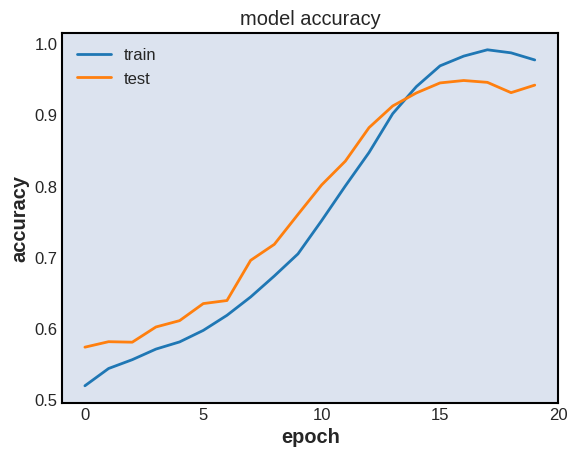

In [ ]:
# summarize history for accuracy
accuracy = [0.5193,0.5436,0.5560,0.5709,0.5810,0.5972,0.6184,0.6442,0.6737,0.7048,0.7516,0.8003,0.8473,0.9019,0.9400,0.9692,0.9829,0.9918,0.9875,0.9775]
val_accuracy = [0.5736,0.5813,0.5806,0.6020,0.6109,0.6349,0.6392,0.6957,0.7182,0.7603,0.8018,0.8352,0.8823,0.9128,0.9311,0.9452,0.9486,0.9460,0.9315,0.9421]

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(np.arange(0,25,5))
plt.grid(False)
plt.show()

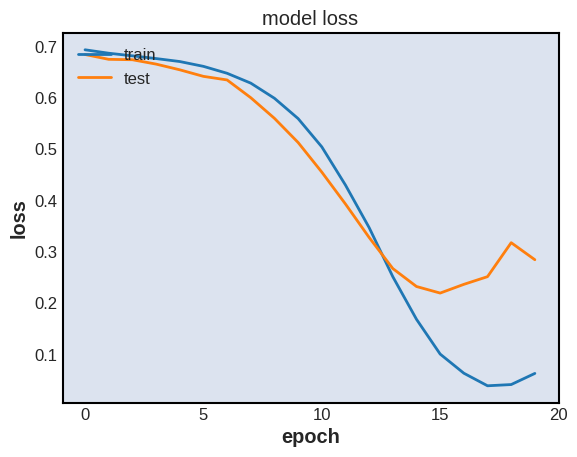

In [ ]:
# summarize history for loss
loss = [0.6936,0.6869,0.6818,0.6765,0.6707,0.6613,0.6478,0.6286,0.5991,0.5595,0.5044,0.4299,0.3470,0.2513,0.1683,0.1005,0.0632,0.0387,0.0411,0.0628]
val_loss = [0.6844,0.6750,0.6742,0.6657,0.6546,0.6418,0.6348,0.6002,0.5600,0.5129,0.4552,0.3930,0.3278,0.2672,0.2322,0.2194,0.2364,0.2514,0.3176,0.2844]

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(np.arange(0,25,5))
plt.grid(False)
plt.show()

In [ ]:
# Melakukan Verifikasi terhadap model dengan melakukan testing menggunakan pembagian Kfold sebagai data Test

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def get_kfolds(model, n_splits = 5):
  kf = KFold(n_splits = n_splits)
  rata_rata = []
  for i, (train_index, test_index) in enumerate(kf.split(gaf_batches_1)):
    x_test = gaf_batches_1[test_index]
    y_test = output_batches_categorical[test_index]

    predicted = model.predict(x_test, verbose=0)
    report = classification_report(np.argmax(y_test,axis=1),np.argmax(predicted,axis=1),output_dict=True)
    akurasi = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    rata_rata.append([akurasi, precision, recall, f1_score])

  rata_rata = np.array(rata_rata).mean(axis=0)
  print('Rata-Rata Hasil Kfolds-',n_splits)
  print('-'*100)
  print('Akurasi :', round(rata_rata[0],10))
  print('precision :', round(rata_rata[1],10))
  print('recall :', round(rata_rata[2],10))
  print('f1_score :', round(rata_rata[3],10))
  print('='*100)
  return rata_rata

Rata-Rata Hasil Kfolds- 2
----------------------------------------------------------------------------------------------------
Akurasi : 0.9448101653
precision : 0.9448118557
recall : 0.9448101653
f1_score : 0.9448106929
Rata-Rata Hasil Kfolds- 3
----------------------------------------------------------------------------------------------------
Akurasi : 0.9448101952
precision : 0.9448144914
recall : 0.9448101952
f1_score : 0.9448114953
Rata-Rata Hasil Kfolds- 4
----------------------------------------------------------------------------------------------------
Akurasi : 0.944810262
precision : 0.9448356106
recall : 0.944810262
f1_score : 0.9448150423
Rata-Rata Hasil Kfolds- 5
----------------------------------------------------------------------------------------------------
Akurasi : 0.944810338
precision : 0.9448429561
recall : 0.944810338
f1_score : 0.9448149633
Rata-Rata Hasil Kfolds- 6
----------------------------------------------------------------------------------------------

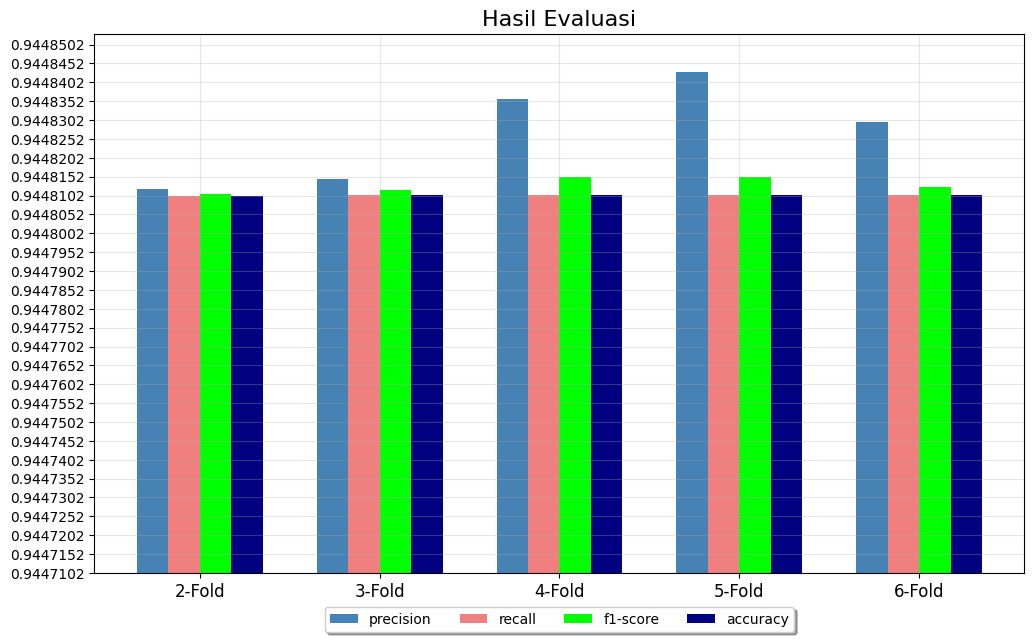

In [ ]:
n_folds = [2,3,4,5,6]
n_folds_title = []
rata_rata_fold = []

for n in n_folds:
  n_folds_title.append(f'{n}-Fold')
  rata_rata_fold.append(
      get_kfolds(model, n_splits = n)
  )

akurasi = np.array(rata_rata_fold)[:,0]
precision = np.array(rata_rata_fold)[:,1]
recall = np.array(rata_rata_fold)[:,2]
f1_score = np.array(rata_rata_fold)[:,3]

x = np.arange(0,len(n_folds)*2,2)
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(x - width*1.5, precision, width, label='precision', color='steelblue')
ax.bar(x - width/2, recall, width, label='recall', color='lightcoral')
ax.bar(x + width/2, f1_score, width, label='f1-score', color='lime')
ax.bar(x + width*1.5, akurasi, width, label='accuracy', color='navy')

ax.set_title('Hasil Evaluasi', size=16)
ax.set_xticks(x)
ax.set_ylim([np.array(rata_rata_fold).min().min()-0.00001, np.array(rata_rata_fold).max().max()+0.00001])
ax.set_yticks(np.arange(np.array(rata_rata_fold).min().min()-0.0001,np.array(rata_rata_fold).max().max()+0.00001,0.000005))
ax.set_xticklabels(n_folds_title, size=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.grid(alpha=0.3)
plt.show()